# Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

* The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

* All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

* **Approved:** The Company has approved loan Application

* **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

* **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

* **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

# Data Understanding

This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.



# Results Expected by Learners

- __Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.__

- __Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)__

**Hint:** _Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach._

- Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.


- Identify if there is data imbalance in the data. Find the ratio of data imbalance.

**Hint:** How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

 

**Hint:** Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

- Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.


- Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.


- Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases.

 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly
from plotly import tools
import plotly.express as px

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# using pandas set_option to have a convinient display of values across dataframes
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns',None)


# read application.csv data

In [4]:
#read
application_df = pd.read_csv('application_data.csv')

In [5]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [6]:
application_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [7]:
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

# Read previous_application.csv

In [8]:
prev_application_df = pd.read_csv("previous_application.csv")

In [9]:
prev_application_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [10]:
# Number or Rows and Columns in the appication.csv Dataset
print('Number of Rows :' ,application_df.shape[0])
print('Number of Columns :',application_df.shape[1])

Number of Rows : 307511
Number of Columns : 122


In [11]:
prev_application_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [12]:
prev_application_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

# check for null values in application data

In [13]:
#count null values in each column
application_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# Analyze missing values

In [14]:
#function to find percentage of missing values in a dataframe
def percent_missing(df):
    return round(df.isnull().sum()/len(df)*100,2)

In [15]:
percent_missing(application_df)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

For lucid analytics and EDA we have considered missing values threshold as 50%
As a next step we will find columns with missing values exceding the defined threshold

In [16]:
# List the names of cols with missing percent > 50
lst_cols_missing_appln_df = percent_missing(application_df)[percent_missing(application_df) > 50]
lst_cols_missing_appln_df

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [17]:
# count number of missing cols
lst_cols_missing_appln_df.count()

41

In [18]:
# Column Names list with more than 50 % missing values

drop_columns = lst_cols_missing_appln_df.index
print(drop_columns)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'], dtype='object')


In [19]:
# Dropping the listed columns from the Dataset Application_data

application_df.drop(columns=drop_columns,inplace=True)

In [20]:
# recheck shape of data post dropping columns

print('Number of rows in application_data.csv after dropping columns :',application_df.shape[0])
print('Number of columns in application_data.csv after dropping columns :',application_df.shape[1])

Number of rows in application_data.csv after dropping columns : 307511
Number of columns in application_data.csv after dropping columns : 81


# Repeating above steps to handle missing values in columns for previous_application.csv

In [21]:
# call percent_missing function on previous_application_df
percent_missing(prev_application_df)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [22]:
#list column names with more than 50% missing values
lst_cols_missing_prev_df = percent_missing(prev_application_df)[percent_missing(prev_application_df) > 50]
lst_cols_missing_prev_df

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64

In [23]:
# Dropping the listed columns from the Dataset Application_data
drop_columns = lst_cols_missing_prev_df.index
prev_application_df.drop(columns=drop_columns,inplace=True)

In [24]:
print('Number of rows in previous_data.csv after dropping columns :',prev_application_df.shape[0])
print('Number of columns in previous_data.csv after dropping columns :',prev_application_df.shape[1])

Number of rows in previous_data.csv after dropping columns : 1670214
Number of columns in previous_data.csv after dropping columns : 33


Now that we have the final list of columns, as a next step we need to impute these with appropriate values

In [25]:
#list of columns to be imputed
percent_missing(application_df)[percent_missing(application_df)>0].sort_values(ascending=False)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
NAME_TYPE_SUITE                  0.42
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
dtype: float64

As we can see there are variables which have more than 40% missing values - For these lets create a separate variable

In [26]:
Null_val_40 = percent_missing(application_df)[percent_missing(application_df)>40]
Null_val_40

YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [27]:
#Dropping these variables due to high amount of null values

application_df.drop(columns = Null_val_40.index ,inplace=True)

In [28]:
#recheck shape
application_df.shape

(307511, 73)

In [29]:
application_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

# Missing value treatment for application_data.csv

In [31]:
# create a separate list of null columns

Null_Col = [application_df.columns[application_df.isnull().sum()/len(application_df)*100 != 0]][0]
Null_Col

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [32]:
#check stats for numerical cols
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  3.068510e+05  246546.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555  5.143927e-01       0.510853                  1.422245                  0.143421                  1.405292                  0.100049             -962.858788         0.000042         0.710023         0.000081         0.015115         0.088055         0.000192         0.081376         0.003896          0.000023          0.003912          0.000007          0.003525          0.002936           0.00121          0.009928          0.000267          0.008130          0.000595          0.000507          0.000335                    0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.91068

# 1. Missing values in AMT_ANNUTIY

In [33]:
#starting with AMT_ANNUITY - check value occurence
application_df.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

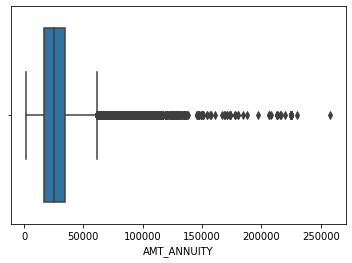

In [34]:
# Box plot -> check the outliers

sns.boxplot(application_df.AMT_ANNUITY)
plt.show()

In [35]:
# calculate median
application_df.AMT_ANNUITY.median()

24903.0

In [36]:
#considering the outliers in the variable AMT_ANNUITY, replacing null values with median value
application_df['AMT_ANNUITY'] = application_df.AMT_ANNUITY.fillna(application_df.AMT_ANNUITY.median())

In [37]:
# QC - checking if above step successful
application_df.AMT_ANNUITY.isnull().sum()

0

# 2. Missing values in Occupation_Type

In [39]:
application_df['OCCUPATION_TYPE'].value_counts(normalize = True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [40]:
print('Number of Missing Values:',application_df["OCCUPATION_TYPE"].isnull().sum())

Number of Missing Values: 96391


imputing the above 96k ~ 31% missing values with "mode" is not a good option. It will increase the Laborers Percentage which will inadvertently affect the mean. Hence we can create a category called "Not Disclosed" for Occupation_Type variable

In [44]:
# impute null values
application_df["OCCUPATION_TYPE"] = application_df.OCCUPATION_TYPE.fillna("Not Disclosed")

In [45]:
# QC -> checking if above was successful
application_df["OCCUPATION_TYPE"].isnull().sum()

0

# 3. Missing values in NAME_TYPE_SUIT

In [46]:
application_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [48]:
print(application_df['NAME_TYPE_SUITE'].isna().sum())
application_df.NAME_TYPE_SUITE.mode()[0]

1292


'Unaccompanied'

We can impute the above 1292 missing with the mode i.e - "Unaccompained"

In [49]:
#Replacing the null values by mode 

application_df["NAME_TYPE_SUITE"] = application_df.NAME_TYPE_SUITE.fillna(application_df.NAME_TYPE_SUITE.mode()[0])

In [50]:
# QC
application_df['NAME_TYPE_SUITE'].isna().sum()

0

# 4.Missing values in CNT_FAM_MENBERS

In [56]:
application_df.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [57]:
application_df.CNT_FAM_MEMBERS.isnull().sum()

2

In [58]:
application_df["CNT_FAM_MEMBERS"] = application_df.CNT_FAM_MEMBERS.fillna(application_df.CNT_FAM_MEMBERS.median())

In [60]:
#QC
application_df.CNT_FAM_MEMBERS.isnull().sum()

0

# 5. Missing in AMT_GOODS_PRICE

In [61]:
application_df.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [63]:
# checking for outliers
sns.boxplot(application_df['AMT_GOODS_PRICE'])
plt.show()

In [68]:
application_df[["AMT_GOODS_PRICE",'AMT_CREDIT']]

AMT_GOODS_PRICE  AMT_CREDIT
0              351000.0    406597.5
1             1129500.0   1293502.5
2              135000.0    135000.0
3              297000.0    312682.5
4              513000.0    513000.0
...                 ...         ...
307506         225000.0    254700.0
307507         225000.0    269550.0
307508         585000.0    677664.0
307509         319500.0    370107.0
307510         675000.0    675000.0

[307511 rows x 2 columns]

1. From the columns description we can assume that the cost or amount of a particular item/good can be greater than or equal to the corresponding loan amount credited
2. Hence we can use AMT_CREDIT column to impute the values missing in AMT_GOODS_PRICE column

In [69]:
application_df["AMT_GOODS_PRICE"] = application_df.AMT_GOODS_PRICE.fillna(application_df['AMT_GOODS_PRICE'] == application_df['AMT_CREDIT'])

In [70]:
#QC
application_df['AMT_GOODS_PRICE'].isna().sum()

0

# 6. Missing values in AMT_REQ_CREDIT variables

In [71]:
AMT_REQ_CREDIT_LST = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [72]:
# impute with median

application_df.fillna(application_df[AMT_REQ_CREDIT_LST].median(),inplace = True)

# 7. Missing values in SOCIAL_CIRCLE variables

In [73]:
SOCIAL_CIRCLE_LST = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [74]:
#impute with median
application_df.fillna(application_df[SOCIAL_CIRCLE_LST].median(),inplace = True)

# 8. Missing values in EXT_SOURCES variables

1.EXT_SOURCE_2

2.EXT_SOURCE_3

In [75]:
application_df['EXT_SOURCE_2'] = application_df.EXT_SOURCE_2.fillna(application_df['EXT_SOURCE_2'].median())
application_df['EXT_SOURCE_3'] = application_df.EXT_SOURCE_3.fillna(application_df['EXT_SOURCE_3'].median())

In [76]:
#Imputing missing values with 0 which is the most occuring value

application_df['DAYS_LAST_PHONE_CHANGE'] = application_df.DAYS_LAST_PHONE_CHANGE.fillna(0)

In [78]:
# final check to see if any null values exist
application_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

Missing values imputation for application_data.csv is done as above

# Missing values imputation for Previous_application_data.csv

In [86]:
percent_missing(prev_application_df)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

# 1. Missing values in NAME_TYPE_SUIT

In [87]:
#Checking the count of values

prev_application_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [88]:
# Impute with mode since it is a categorical variable
prev_application_df['NAME_TYPE_SUITE'] = prev_application_df['NAME_TYPE_SUITE'].fillna(prev_application_df['NAME_TYPE_SUITE'].mode()[0])

In [90]:
#QC
prev_application_df.NAME_TYPE_SUITE.isnull().sum()

0

### 2. Missing values in 'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT'

In [91]:
# Checking statistics to understand the distribution

prev_application_df[['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']].describe()

AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT
count     1.284699e+06  1.297979e+06  1.297984e+06
mean      2.278473e+05  1.595512e+04  1.605408e+01
std       3.153966e+05  1.478214e+04  1.456729e+01
min       0.000000e+00  0.000000e+00  0.000000e+00
25%       5.084100e+04  6.321780e+03  6.000000e+00
50%       1.123200e+05  1.125000e+04  1.200000e+01
75%       2.340000e+05  2.065842e+04  2.400000e+01
max       6.905160e+06  4.180581e+05  8.400000e+01

1. From the columns description we can assume that the cost or amount of a particular item/good can be greater than or equal to the corresponding loan amount credited
2. Hence we can use AMT_CREDIT column to impute the values missing in AMT_GOODS_PRICE column

In [92]:
prev_application_df["AMT_GOODS_PRICE"] = prev_application_df.AMT_GOODS_PRICE.fillna(prev_application_df['AMT_GOODS_PRICE'] == prev_application_df['AMT_CREDIT'])

In [95]:
#QC
prev_application_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [93]:
#imputing null values with median

prev_application_df['AMT_ANNUITY'] = prev_application_df.AMT_ANNUITY.fillna(prev_application_df.AMT_ANNUITY.median())

In [94]:
#QC
prev_application_df['AMT_ANNUITY'].isnull().sum()

0

In [96]:
#imputing usig median
prev_application_df['CNT_PAYMENT'] = prev_application_df.CNT_PAYMENT.fillna(prev_application_df.CNT_PAYMENT.median())

In [97]:
prev_application_df['CNT_PAYMENT'].isnull().sum()

0

Since the above 2 variables are numerical with outliers persent , we have used median to impute the missing values

## 3.Missing values for PRODUCT_COMBINATION variable

In [101]:
prev_application_df['PRODUCT_COMBINATION'].value_counts(normalize=True)

Cash                              0.171437
POS household with interest       0.157837
POS mobile with interest          0.132121
Cash X-Sell: middle               0.086146
Cash X-Sell: low                  0.077983
Card Street                       0.067406
POS industry with interest        0.059174
POS household without interest    0.049639
Card X-Sell                       0.048247
Cash Street: high                 0.035707
Cash X-Sell: high                 0.035505
Cash Street: middle               0.020751
Cash Street: low                  0.020257
POS mobile without interest       0.014419
POS other with interest           0.014297
POS industry without interest     0.007545
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

Since the variable is categorical, we can use mode to impute the missing values

In [99]:
prev_application_df['PRODUCT_COMBINATION'] = prev_application_df['PRODUCT_COMBINATION'].fillna(prev_application_df['PRODUCT_COMBINATION'].mode()[0])

In [100]:
#QC
prev_application_df.PRODUCT_COMBINATION.isnull().sum()

0

## Standardize and normalize application_data.csv

#### 1.Creating a column "AGE_YEARS" using "DAYS_BIRTH"

In [109]:
application_df['AGE_IN_YEARS'] = round(abs(application_df['DAYS_BIRTH']/365),2)

In [110]:
# Creating a Bucket for age

application_df['AGE_IN_YEARS_BUCKET'] = pd.cut(application_df['AGE_IN_YEARS'],bins=[0,20,25,30,35,40,45,50,55,60,65,70],
                                              labels=["0-20",'20-25','25-30','30-35','35-40','40-45','45-50','50-55',
                                                      '55-60','60-65','above 65'])

In [126]:
application_df.AGE_IN_YEARS_BUCKET.value_counts(normalize = True)*100

35-40       13.938038
40-45       13.461632
30-35       12.830435
45-50       11.423982
50-55       11.366097
55-60       10.768395
25-30       10.687748
60-65        8.934965
20-25        3.959208
above 65     2.629499
0-20         0.000000
Name: AGE_IN_YEARS_BUCKET, dtype: float64

#### 2.Creating a column "EMPLOYMENT_IN_YEARS" using "DAYS_EMPLOYED"

In [114]:
application_df['EMPLOYEMENT_IN_YEARS'] = round(abs(application_df['DAYS_EMPLOYED']/365),2)

In [116]:
application_df['EMPLOYMENT_YEARS_BUCKET'] = pd.cut(application_df['EMPLOYEMENT_IN_YEARS'],
                                                  bins=[0,5,10,15,20,25,30,35,40,45,50,55],
                                                  labels=["0-5",'5-10','10-15','15-20','20-25','25-30','30-35','35-40',
                                                          '40-45','45-50','above 50'])

In [125]:
application_df.EMPLOYMENT_YEARS_BUCKET.value_counts(normalize = True)*100

0-5         54.079577
5-10        25.719657
10-15       10.923160
15-20        4.300491
20-25        2.473685
25-30        1.312397
30-35        0.768639
35-40        0.329587
40-45        0.083289
45-50        0.009519
above 50     0.000000
Name: EMPLOYMENT_YEARS_BUCKET, dtype: float64

**Quick Insight** -> 54% of applicants have employement experience upto 5 years

### 3. Standardize AMT_TOTAL_INCOME

In [118]:
application_df['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [119]:
application_df['AMT_INCOME_TOTAL_LAKHS'] = round(application_df['AMT_INCOME_TOTAL']/100000,2)

In [121]:
# create buckets for AMT_INCOME_TOTAL_LAKHS


application_df['AMT_INCOME_TOTAL_BUCKET'] = pd.cut(application_df['AMT_INCOME_TOTAL_LAKHS'],
                                                  bins = [0,1,2,3,4,5,6,7,8,9,10,100], 
                                                  labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L',
                                                            '8-9L','9-10L','Above 10L'])

In [124]:
application_df.AMT_INCOME_TOTAL_BUCKET.value_counts(normalize = True)*100

1-2L         50.694941
2-3L         21.190668
0-1L         20.721737
3-4L          4.787193
4-5L          1.727760
5-6L          0.356088
6-7L          0.282594
8-9L          0.097233
Above 10L     0.080323
7-8L          0.052682
9-10L         0.008780
Name: AMT_INCOME_TOTAL_BUCKET, dtype: float64

**QUICK Insight**
-> more than 50% of applicants have income in the range 1-2LPA

### 4. Standardize AMT_CREDIT

In [127]:
#Converting AMT_CREDIT in lakhs scale

application_df['AMT_CREDIT_LAKHS'] = round(application_df['AMT_CREDIT']/100000,2)

In [128]:
#Bucketing
application_df['AMT_CREDIT_LAKHS_BUCKET'] = pd.cut(application_df['AMT_CREDIT_LAKHS'],
                                                     bins = [0,5,10,15,20,25,30,35,40,45], 
                                                     labels = ['0-5L','5-10L','10-15L','15-20L','20-25L','25-30L',
                                                               '30-35L','35-40L','Above 40L'])

In [129]:
application_df.AMT_CREDIT_LAKHS_BUCKET.value_counts(normalize = True)*100

0-5L         48.744923
5-10L        35.001350
10-15L       12.755966
15-20L        2.837947
20-25L        0.542420
25-30L        0.106988
30-35L        0.005853
Above 40L     0.003252
35-40L        0.001301
Name: AMT_CREDIT_LAKHS_BUCKET, dtype: float64

In [131]:
#QC -> checking if all buckets created prperly
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_IN_YEARS AGE_IN_YEARS_BUCKET  EMPLOYEMENT_IN_YEARS EMPLOYMENT_YEARS_BUCKET  AMT_INCOME_TOTAL_LAKHS AMT_INCOME_TOTAL_BUCKET  AMT_CREDIT_LAKHS AMT_CREDIT_LAKHS_BUCKET
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5          351000   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         25.92               25-30                  1.75                     0-5                    2.02                    2-3L              4.07                    0-5L
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5      1.1295e+06          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                      

### 5.  Next we can create a metric to compare the amount of credit available for the total income received

Credit Ratio = Credit available / Income

In [132]:
application_df['Credit_Ratio'] = round(application_df.AMT_CREDIT/application_df.AMT_INCOME_TOTAL,2)

In [133]:
application_df.Credit_Ratio.describe()

count    307511.000000
mean          3.957585
std           2.689684
min           0.000000
25%           2.020000
50%           3.270000
75%           5.160000
max          84.740000
Name: Credit_Ratio, dtype: float64

In [134]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_IN_YEARS AGE_IN_YEARS_BUCKET  EMPLOYEMENT_IN_YEARS EMPLOYMENT_YEARS_BUCKET  AMT_INCOME_TOTAL_LAKHS AMT_INCOME_TOTAL_BUCKET  AMT_CREDIT_LAKHS AMT_CREDIT_LAKHS_BUCKET  Credit_Ratio
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5          351000   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         25.92               25-30                  1.75                     0-5                    2.02                    2-3L              4.07                    0-5L          2.01
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5      1.1295e+06          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.

In [138]:
# Replacing XNA(mean Not applicable) with nan 

application_df = application_df.replace('XNA',np.NaN)

In [213]:
#Convrsion of 0 to No and 1 to Yes for Flag variables for better understanding of the variables

application_df['FLAG_MOBIL'] = application_df['FLAG_MOBIL'].apply(lambda x : 'YES' if x == 1 else 'NO')
application_df['FLAG_EMP_PHONE'] = application_df['FLAG_EMP_PHONE'].apply(lambda x : 'YES' if x == 1 else 'NO')
application_df['FLAG_WORK_PHONE'] = application_df['FLAG_WORK_PHONE'].apply(lambda x : 'YES' if x == 1 else 'NO')
application_df['FLAG_CONT_MOBILE'] = application_df['FLAG_CONT_MOBILE'].apply(lambda x : 'YES' if x == 1 else 'NO')
application_df['FLAG_PHONE'] = application_df['FLAG_PHONE'].apply(lambda x : 'YES' if x == 1 else 'NO')
application_df['FLAG_EMAIL'] = application_df['FLAG_EMAIL'].apply(lambda x : 'YES' if x == 1 else 'NO')

## Standardize, Normalize and Bucketing for Previous_application dataset

In [135]:
#Converting to lakhs scale

prev_application_df['AMT_ANNUITY_LAKHS'] = prev_application_df['AMT_ANNUITY']/100000
prev_application_df['AMT_APPLICATION_LAKHS'] = prev_application_df['AMT_APPLICATION']/100000
prev_application_df['AMT_CREDIT_LAKHS'] = prev_application_df['AMT_CREDIT']/100000

In [224]:
# Replacing XNA(Not Avilable) and XAP(Not APPLICABLE) to nan

prev_application_df = prev_application_df.replace('XNA',np.NaN)
prev_application_df = prev_application_df.replace('XAP',np.NaN)

## Data Analysis - Application_data.csv

### Univariate Analysis

##### 1. CODE_GENDER

F    0.658352
M    0.341648
Name: CODE_GENDER, dtype: float64


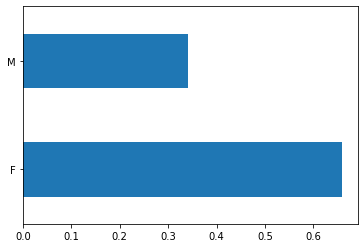

In [144]:
print(application_df.CODE_GENDER.value_counts(normalize=True))
application_df.CODE_GENDER.value_counts(normalize = True).plot.barh()

**Insight** -> Female applicants are more than 65% of total applicants

##### 2. OCCUPATION_TYPE

Not Disclosed            0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


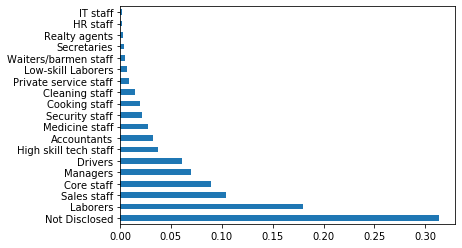

In [145]:
print(application_df.OCCUPATION_TYPE.value_counts(normalize=True))
application_df.OCCUPATION_TYPE.value_counts(normalize = True).plot.barh()

#### 3.Education

In [147]:
application_df.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

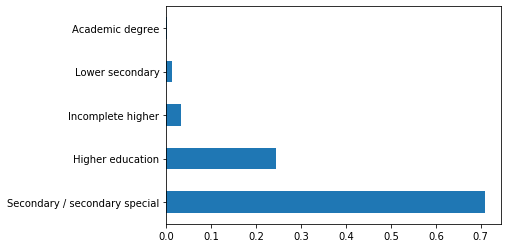

In [149]:
application_df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()

**Quick Insight** -> 70% of total applicants have a Secondary/secondary special education degree

#### 4.AGE

In [150]:
application_df.AGE_IN_YEARS_BUCKET.value_counts(normalize = True)

35-40       0.139380
40-45       0.134616
30-35       0.128304
45-50       0.114240
50-55       0.113661
55-60       0.107684
25-30       0.106877
60-65       0.089350
20-25       0.039592
above 65    0.026295
0-20        0.000000
Name: AGE_IN_YEARS_BUCKET, dtype: float64

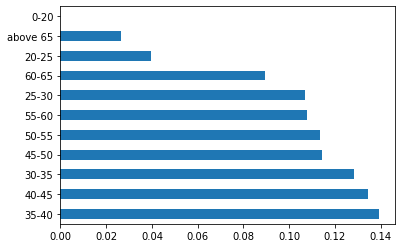

In [151]:
application_df.AGE_IN_YEARS_BUCKET.value_counts(normalize = True).plot.barh()

**Quick Insights**
1. Age group 35-40 contribute to maximum loan applicants ~ 14% followed by 40-45 age group contributing to ~ 13.5% of applicants
2. Age group 0-20 contributes ~0% implicating a low liability for younger generation
3. The loan application trend incerases as the age increases till age reaches 50-55, post that there is a declining trend

#### 5. Salary

In [154]:
application_df.AMT_INCOME_TOTAL_BUCKET.value_counts()

1-2L         155891
2-3L          65163
0-1L          63721
3-4L          14721
4-5L           5313
5-6L           1095
6-7L            869
8-9L            299
Above 10L       247
7-8L            162
9-10L            27
Name: AMT_INCOME_TOTAL_BUCKET, dtype: int64

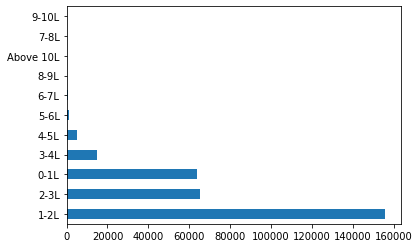

In [155]:
application_df.AMT_INCOME_TOTAL_BUCKET.value_counts().plot.barh()

**Quick Insights**
1. Approx 50% of total applicants have salary in the range of 1-2 Lakhs
2. Loan applications show a decreasing trend as salary tends to increase

#### 6. Employement years

In [162]:
application_df.EMPLOYMENT_YEARS_BUCKET.value_counts()

0-5         136353
5-10         64848
10-15        27541
15-20        10843
20-25         6237
25-30         3309
30-35         1938
35-40          831
40-45          210
45-50           24
above 50         0
Name: EMPLOYMENT_YEARS_BUCKET, dtype: int64

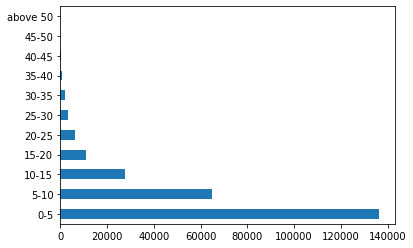

In [158]:
application_df.EMPLOYMENT_YEARS_BUCKET.value_counts().plot.barh()

**Quick Insight**
1. 54% of total loan applicants have and average work experience of upto 5 years
2. Approx 80% of loan applicants have work experience of upto 10 years

In [163]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_IN_YEARS AGE_IN_YEARS_BUCKET  EMPLOYEMENT_IN_YEARS EMPLOYMENT_YEARS_BUCKET  AMT_INCOME_TOTAL_LAKHS AMT_INCOME_TOTAL_BUCKET  AMT_CREDIT_LAKHS AMT_CREDIT_LAKHS_BUCKET  Credit_Ratio
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5          351000   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         25.92               25-30                  1.75                     0-5                    2.02                    2-3L              4.07                    0-5L          2.01
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5      1.1295e+06          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.

#### 7. Contract Type

In [168]:
application_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

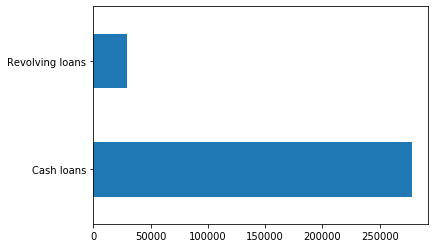

In [167]:
application_df.NAME_CONTRACT_TYPE.value_counts().plot.barh()

**Quick Insight**
1. Out of total loans 90% are cash loans

#### 8. Target variable

In [169]:
application_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

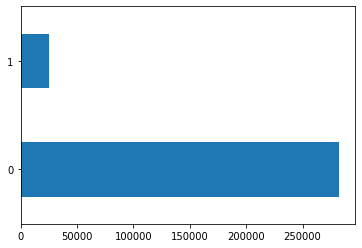

In [170]:
application_df.TARGET.value_counts().plot.barh()

**Quick Insight**
1. Proportion of defaulters / payment difficulties is ~8% 
2. Ratio of Imbalance - There are ~12 non-default customers per 1 default customer

# Analysis of TARGET Variable

 **Segmenting Target varibale**
 
- TARGET = 1 is Difficult_Payment/Defaulters
- TARGET = 0 is Easy_Payment/ Non Defaulters

In [171]:
Target_Defaulters = application_df[application_df.TARGET == 1]
Target_Non_Defaulters = application_df[application_df.TARGET == 0]

In [173]:
def plot_target_var(variable):
    
    
    plt.style.use('classic')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    
    sns.countplot(x=variable, data=Target_Defaulters,linewidth=1,ax=ax1,edgecolor=sns.color_palette("dark", 3))
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {variable} Target_Defaulters',fontsize=18)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(Target_Defaulters))*100), (p.get_x()+0.4, p.get_height()+100), ha='center')
        
    sns.countplot(x=variable, data=Target_Non_Defaulters,ax=ax2,linewidth=1,edgecolor=sns.color_palette("dark", 3))
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {variable} Target_Non_Defaulters',fontsize = 18,)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(Target_Non_Defaulters))*100), (p.get_x()+0.4, p.get_height()+100), ha='center')
    
    plt.show()

In [184]:
def plot_target_numeric(variable):
    
    sns.set(style='white')
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(Target_Defaulters[variable].dropna())
    plt.title('Distribution for Defaulters',fontsize=15)
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 2)
    sns.distplot(Target_Non_Defaulters[variable].dropna())
    plt.title('Distribution for Non_Defaulters',fontsize=15)
    plt.xlabel(variable)
    
    plt.show()


In [175]:
application_df.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_IN_YEARS AGE_IN_YEARS_BUCKET  EMPLOYEMENT_IN_YEARS EMPLOYMENT_YEARS_BUCKET  AMT_INCOME_TOTAL_LAKHS AMT_INCOME_TOTAL_BUCKET  AMT_CREDIT_LAKHS AMT_CREDIT_LAKHS_BUCKET  Credit_Ratio
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5          351000   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         25.92               25-30                  1.75                     0-5                    2.02                    2-3L              4.07                    0-5L          2.01
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5      1.1295e+06          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.

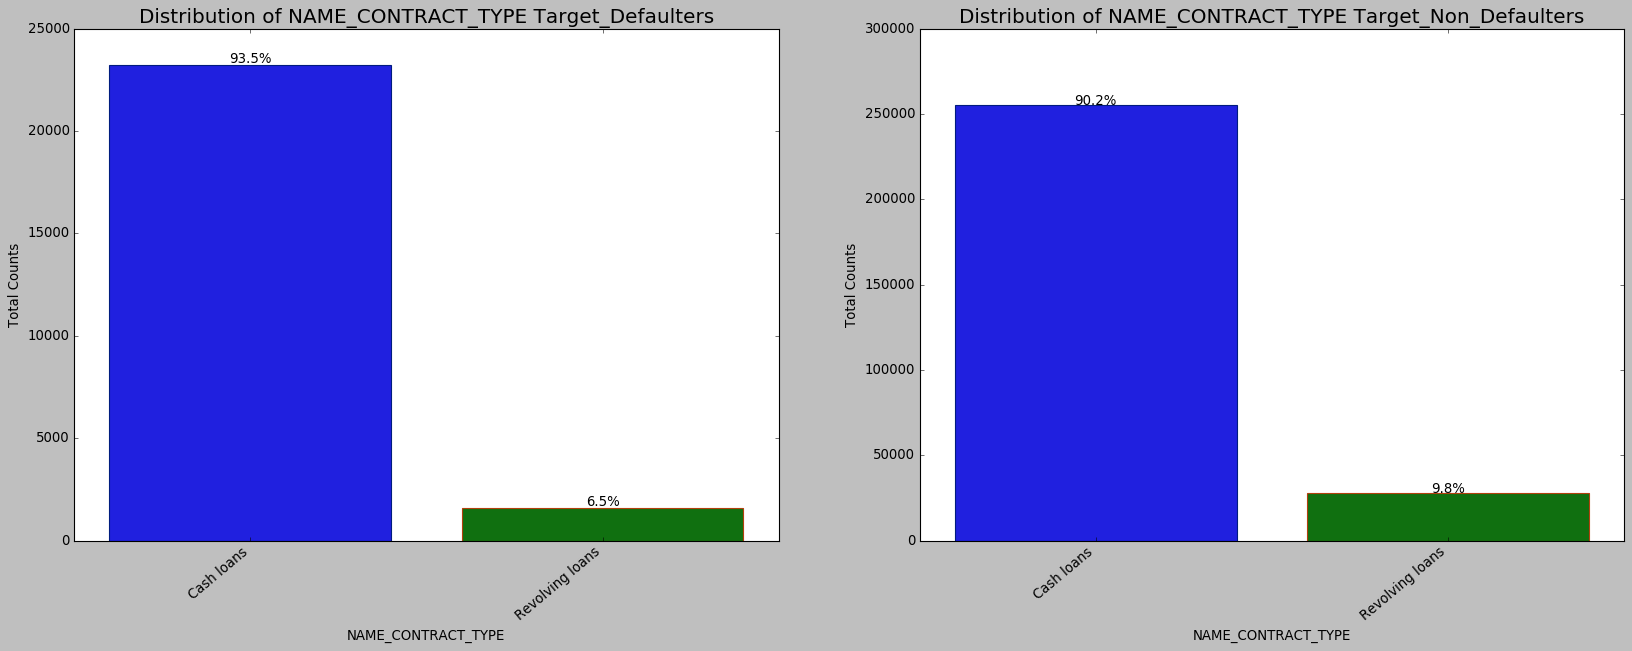

In [176]:
plot_target_var('NAME_CONTRACT_TYPE')

**Insight**
-Cash Loans are in a majority for both segments

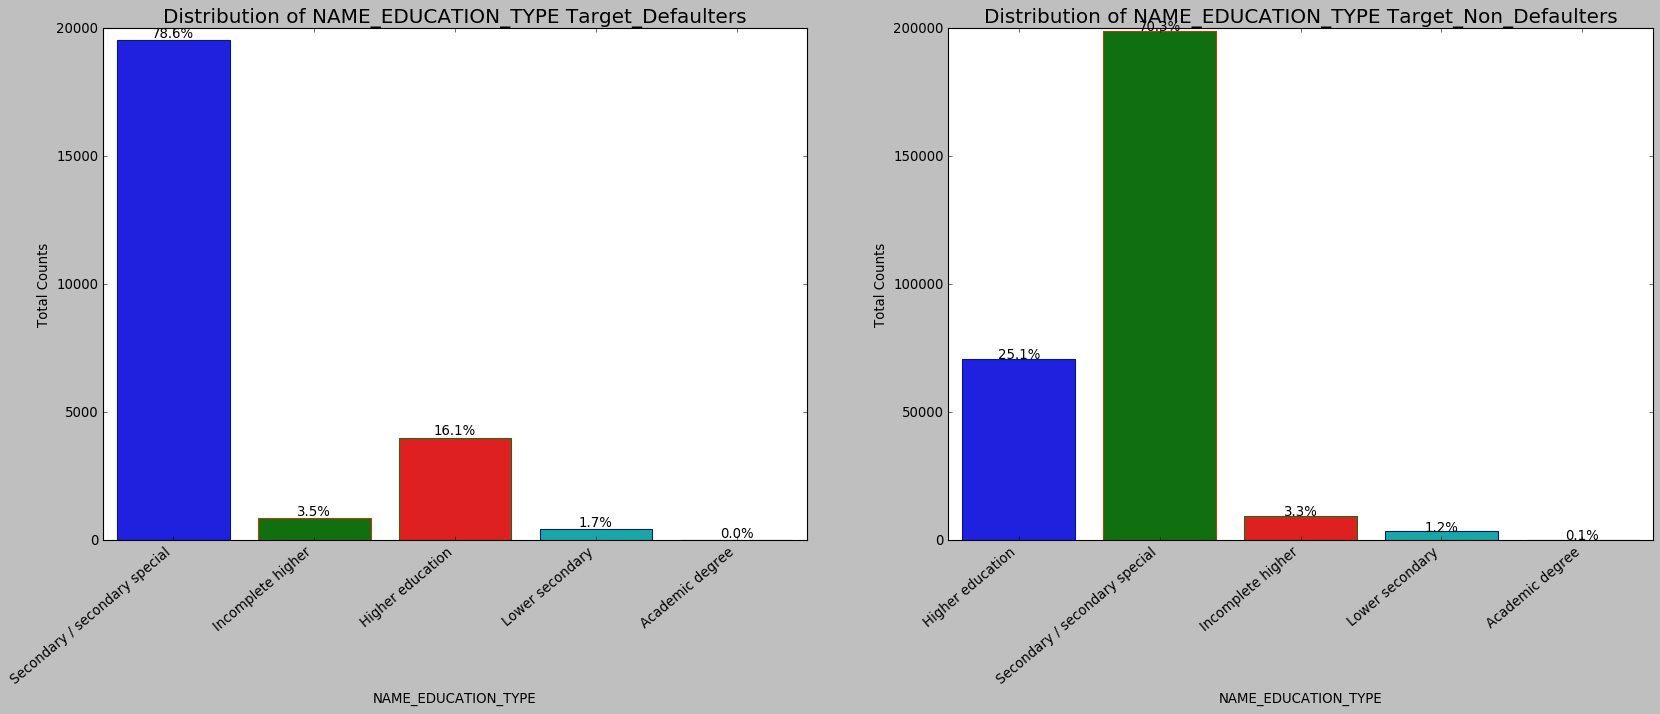

In [177]:
plot_target_var('NAME_EDUCATION_TYPE')

**Insight** - 78% of defaulters have a secondary only education

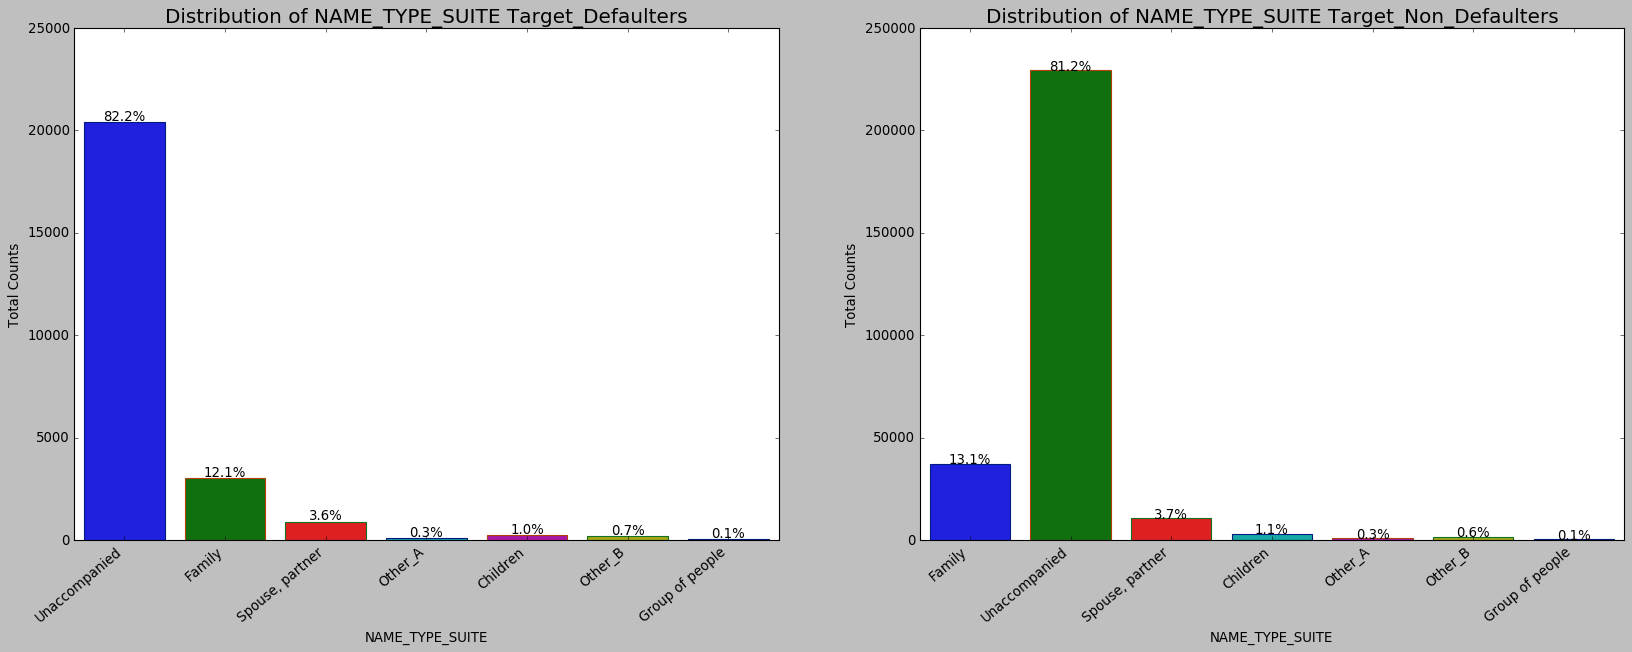

In [180]:
plot_target_var('NAME_TYPE_SUITE')

**Insight** - 80% defaulters are Unaccompained individuals

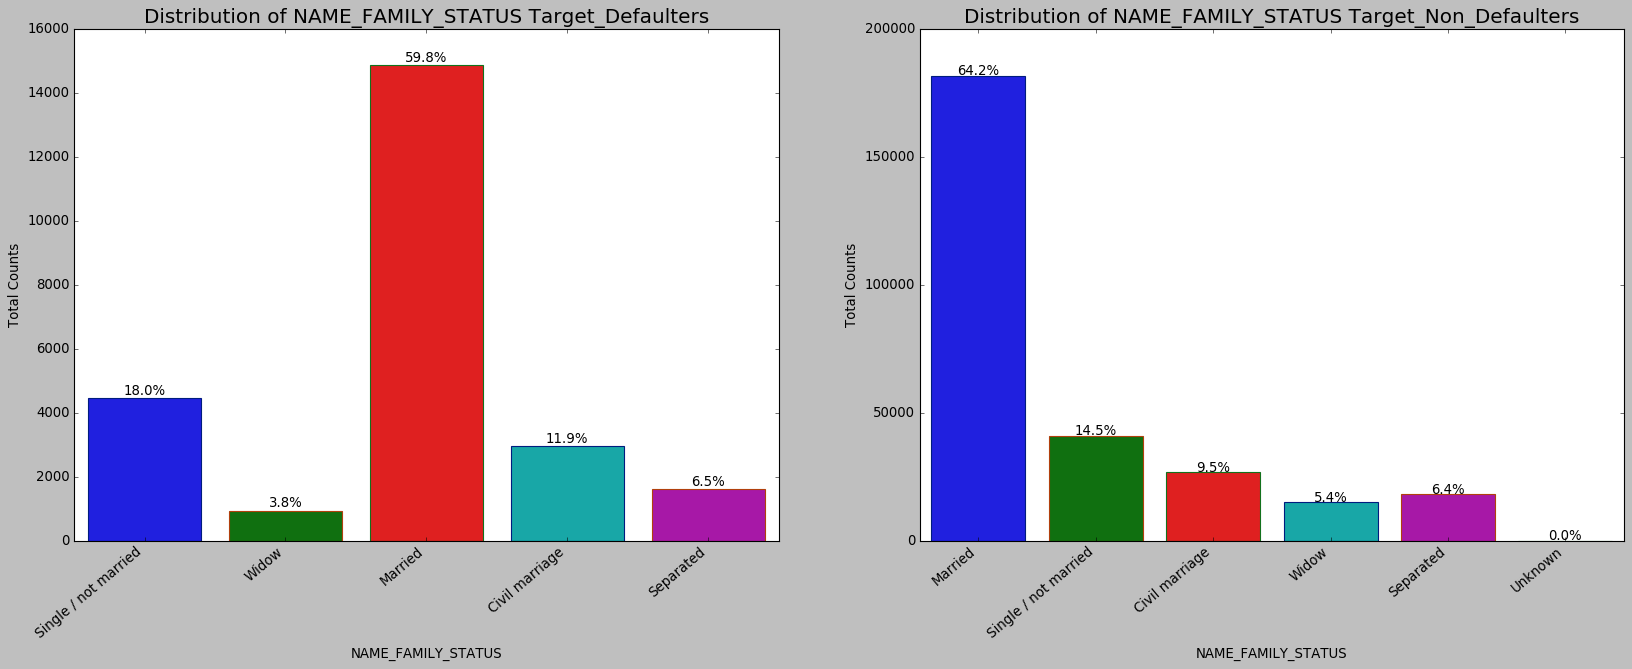

In [181]:
plot_target_var('NAME_FAMILY_STATUS')

**Insight** - In both the segments Married is the most prominient category

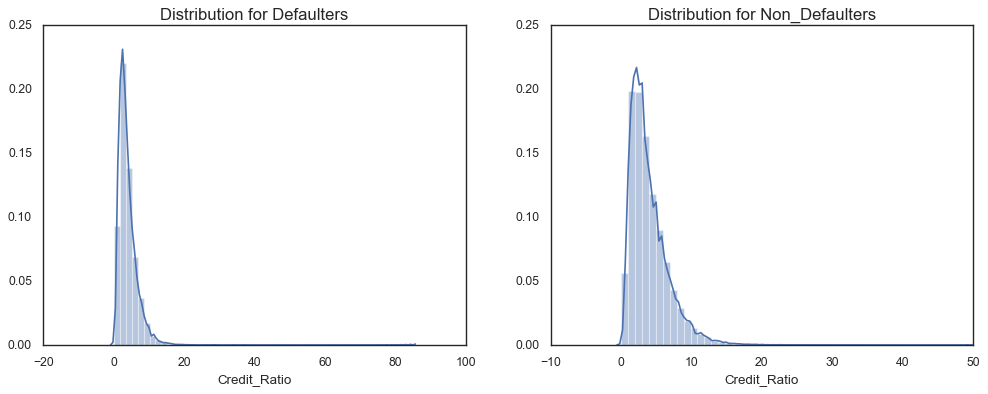

In [185]:
plot_target_numeric('Credit_Ratio')

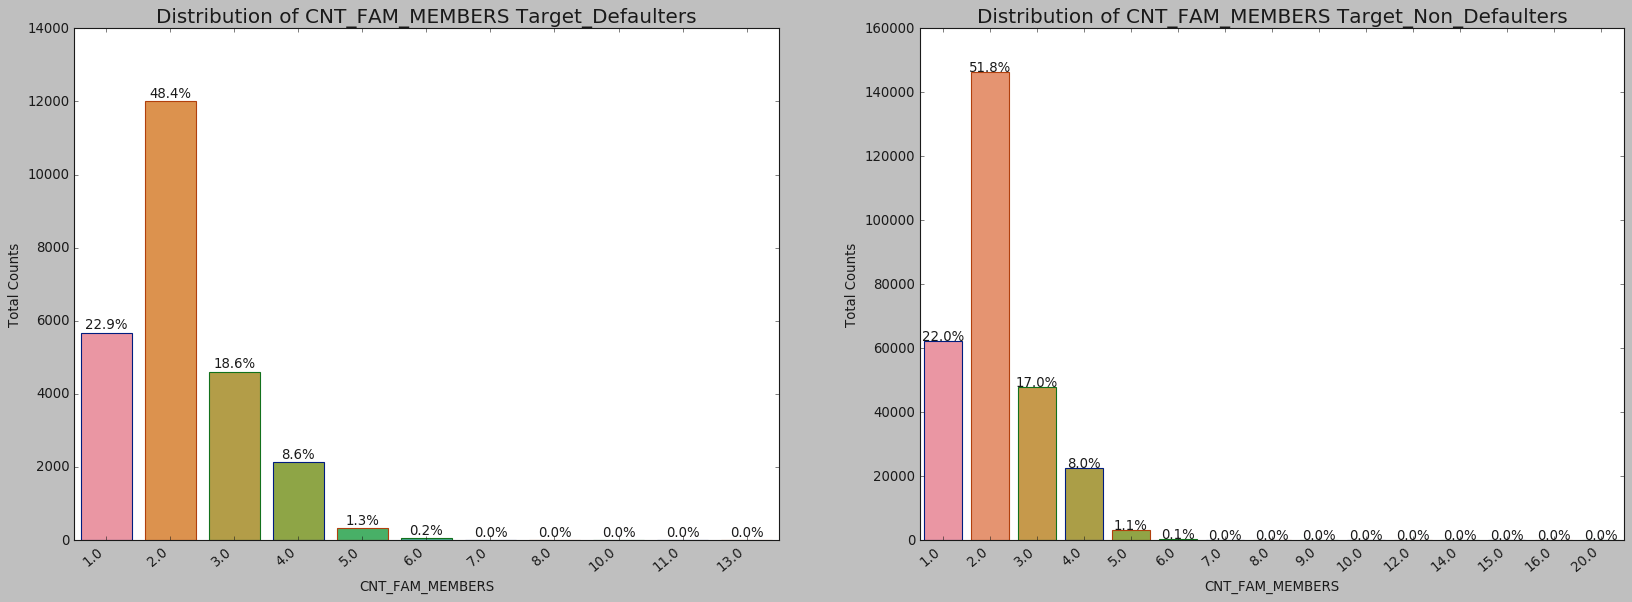

In [186]:
plot_target_var('CNT_FAM_MEMBERS')

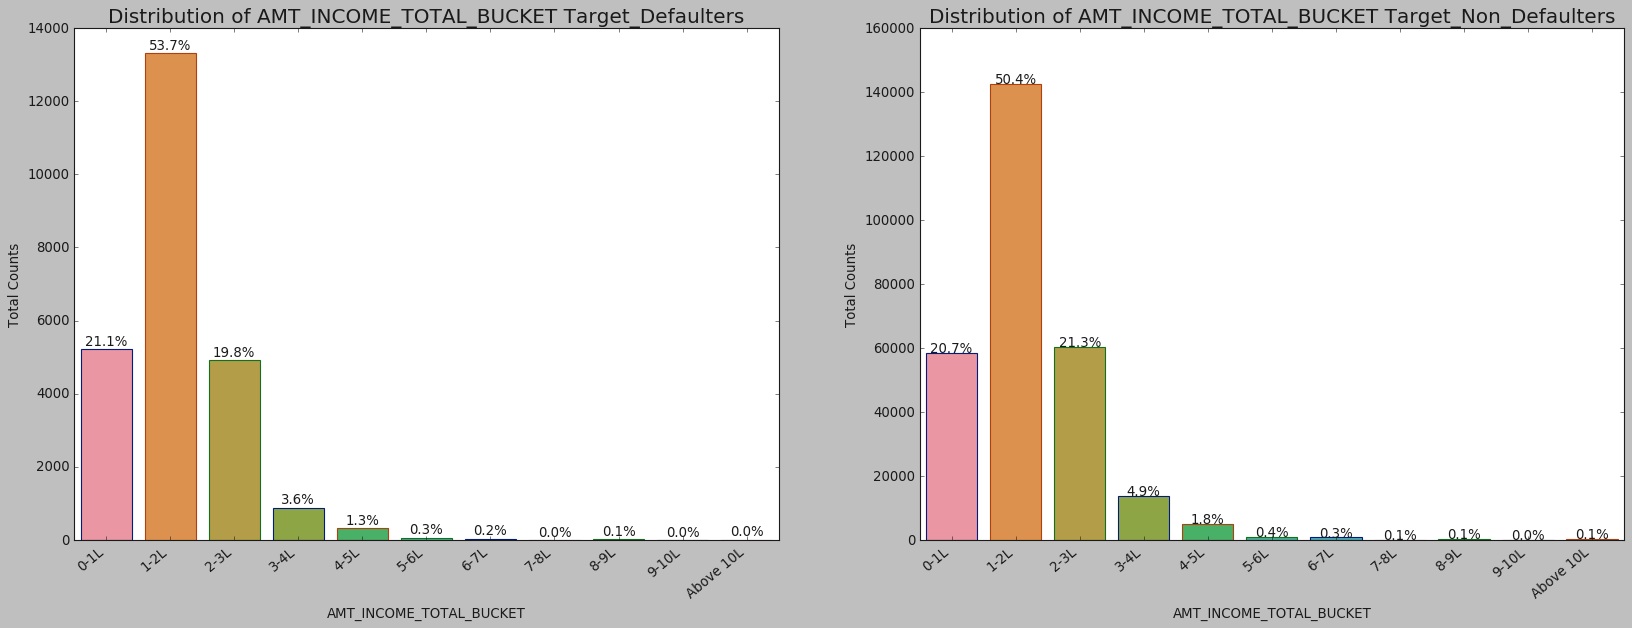

In [209]:
plot_target_var('AMT_INCOME_TOTAL_BUCKET')

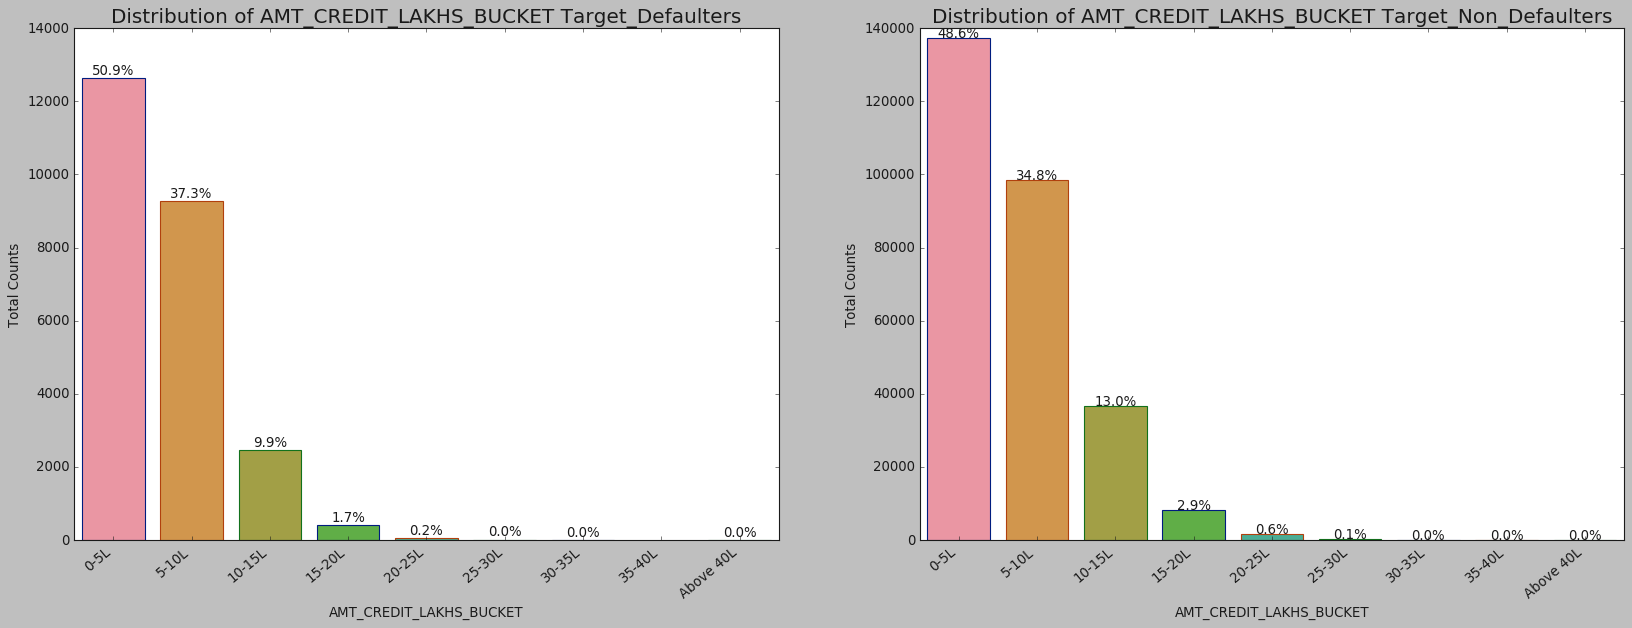

In [212]:
plot_target_var('AMT_CREDIT_LAKHS_BUCKET')

**Insights**

--Majority of people who default on loan payments were seen to have poor education background with income ranging from 1-2 LPA
Predominantly married with an average family size of 2, is also a cause for the loan amount to be due

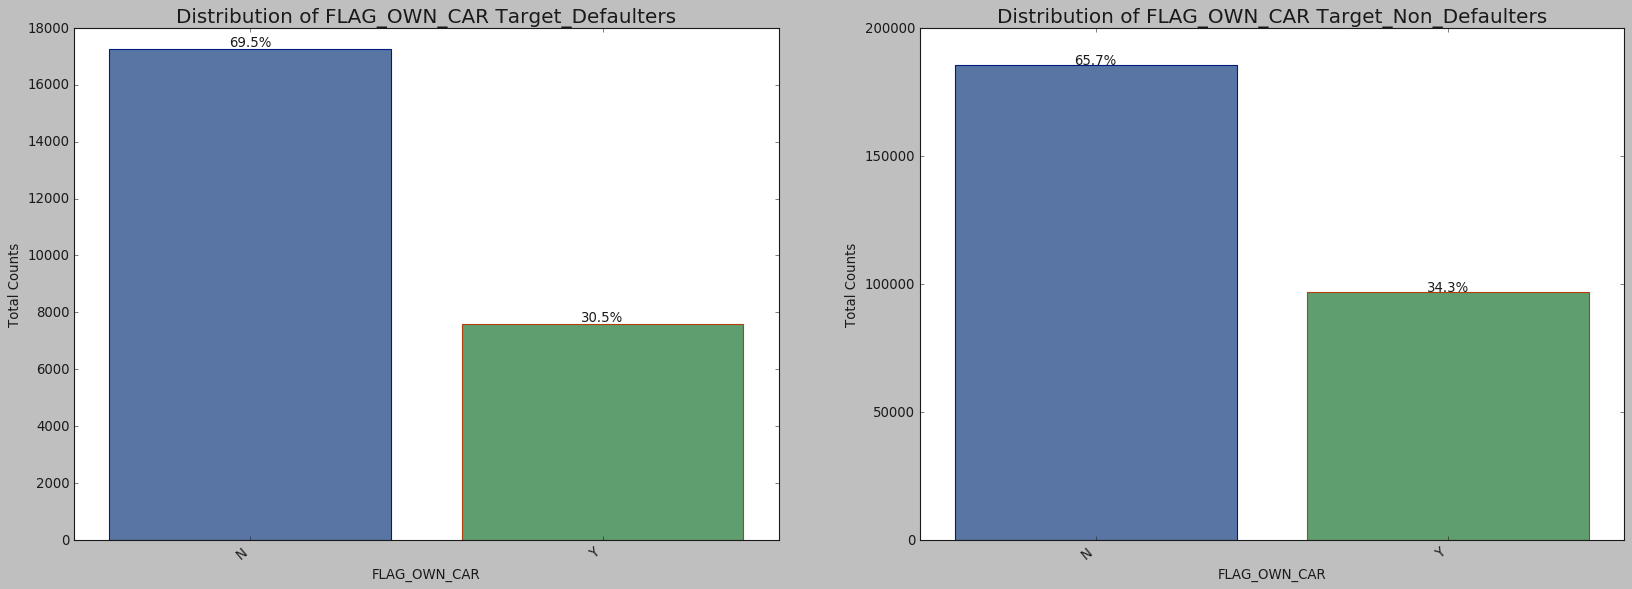

In [214]:
plot_target_var('FLAG_OWN_CAR')

In [215]:
plot_target_var('FLAG_OWN_REALTY')

**Insights**
1. On an average 30% of defaulters seem to own cars and real estate, that can be implied by the fact that they take loans
   such as car loan and house loan
2. ~70% defaulters do not own realty or cars which implies the loan amount can be for higher education 

# Bivariate & Multivariate Analysis

1. Education_Type Vs Target

In [191]:

plt.figure(figsize = (20,5))
sns.barplot(x=application_df['NAME_EDUCATION_TYPE'],y=application_df['TARGET'])
plt.show()

**Insight**
 - As compared, applicants with a Lower secondary education level have difficuilty in loan repayment

2. OccupationType Vs Target

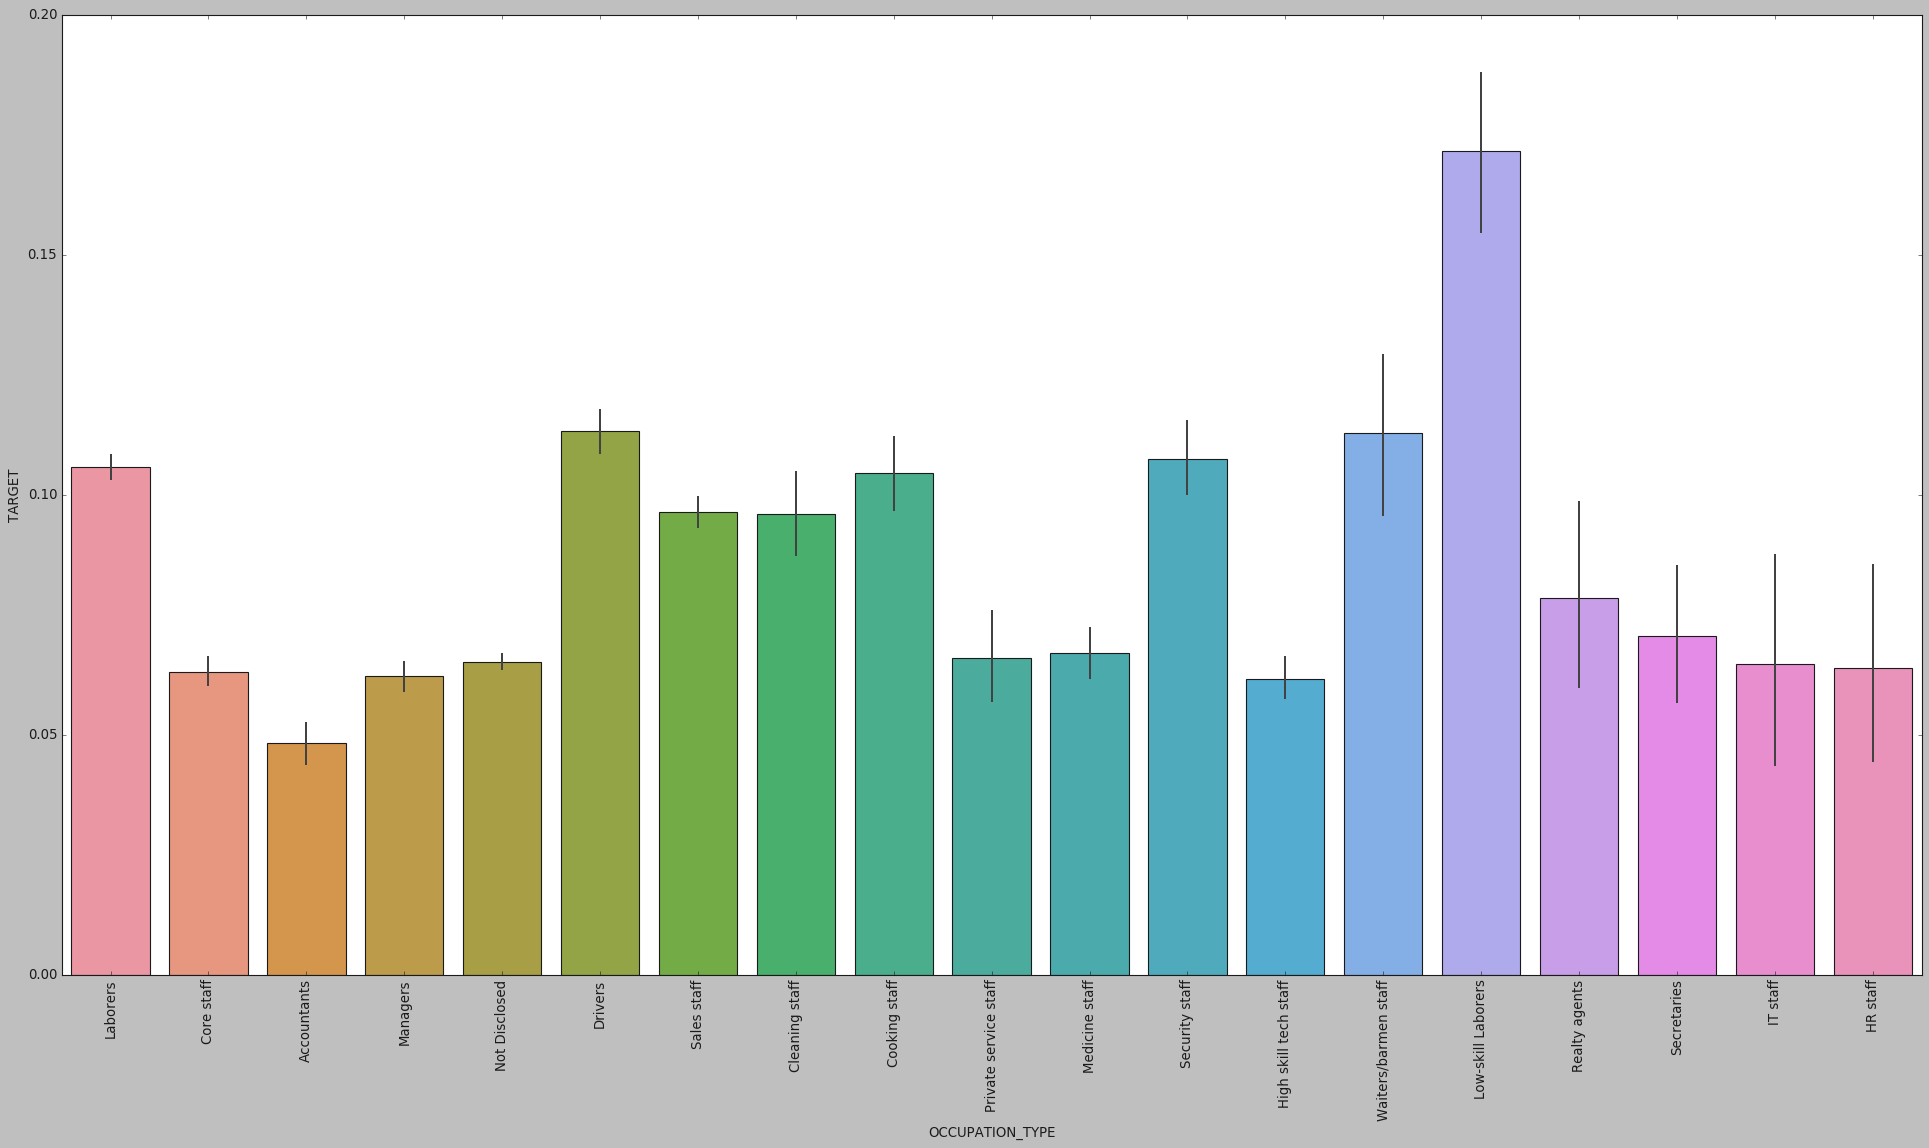

In [194]:
plt.figure(figsize = (30,15))
sns.barplot(x=application_df['OCCUPATION_TYPE'],y=application_df['TARGET'])
plt.xticks(rotation = 90)
plt.show()

**Insight**
- Low Skill Laborers find it more difficult to pay loan as compared to others

##### 3. Age Vs Target

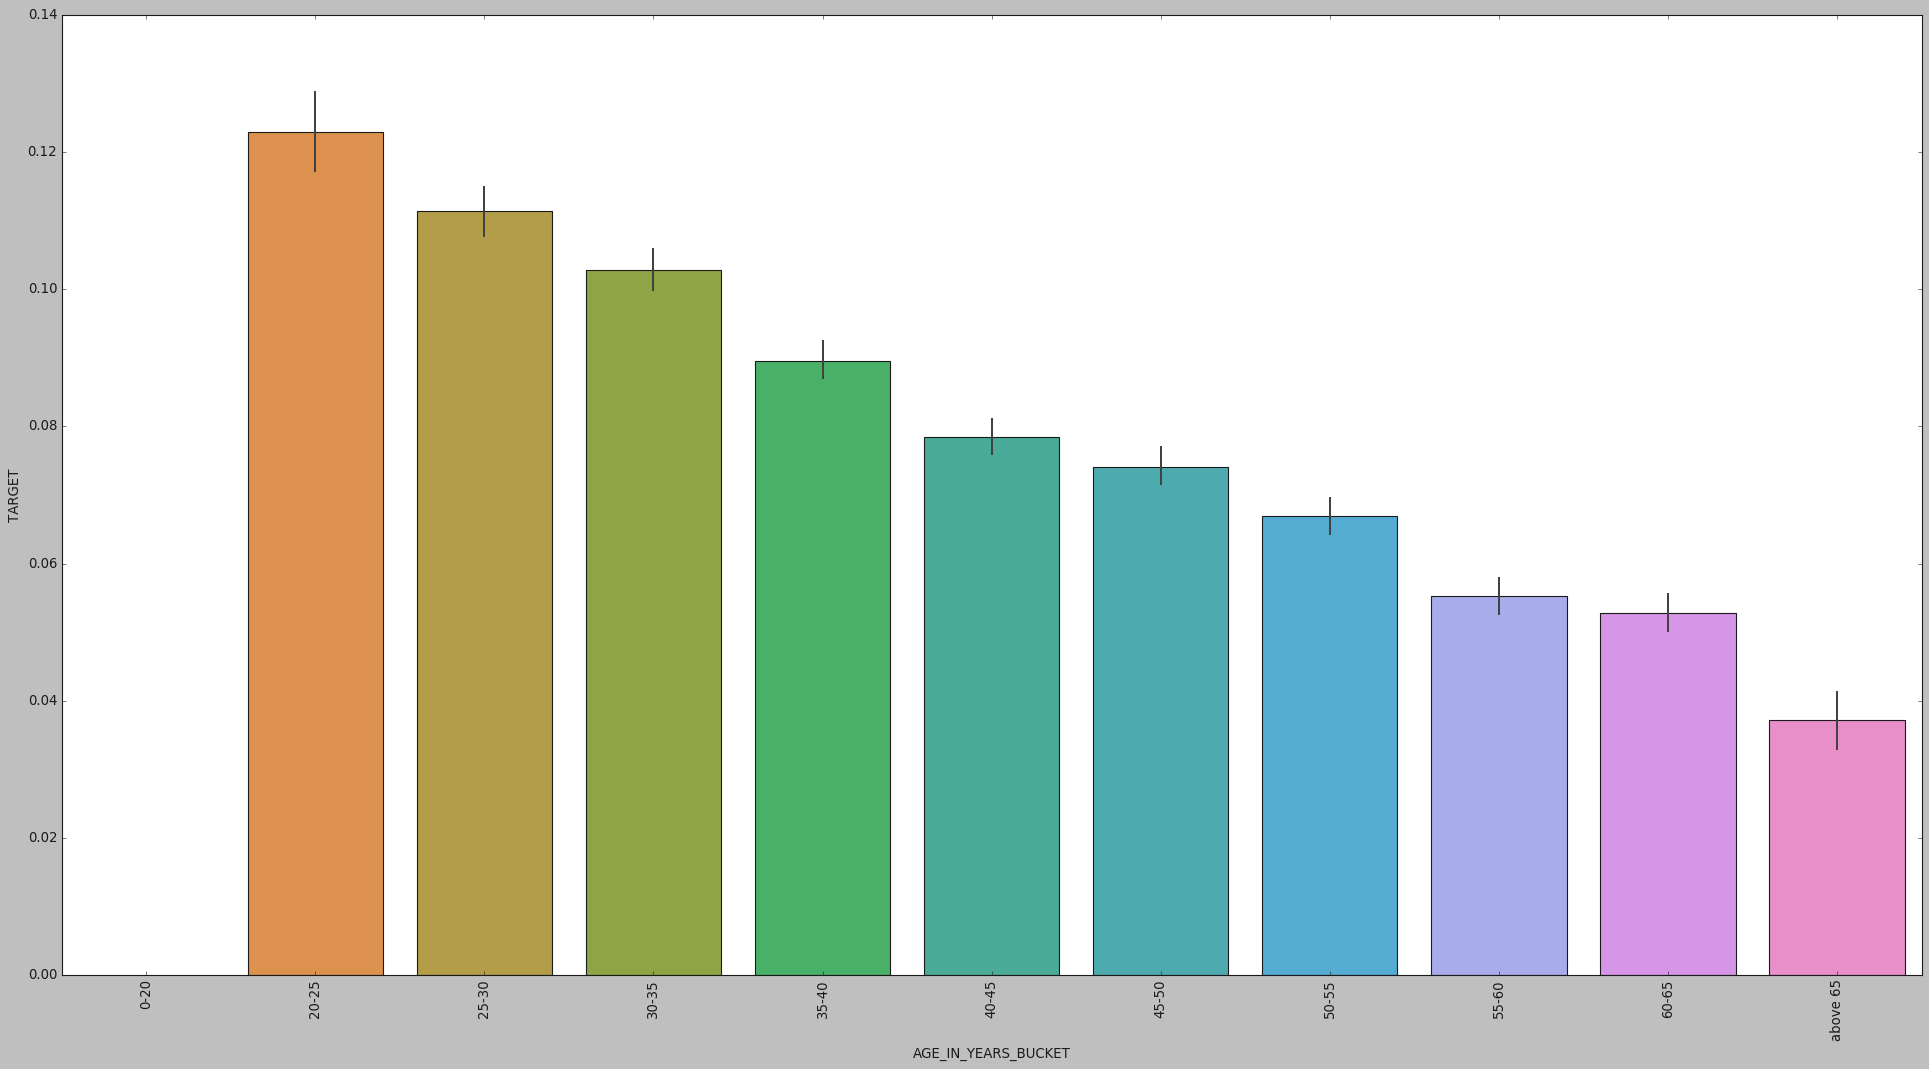

In [195]:
plt.figure(figsize = (30,15))
sns.barplot(x=application_df['AGE_IN_YEARS_BUCKET'],y=application_df['TARGET'])
plt.xticks(rotation = 90)
plt.show()

**Insight**
- Defaulters are likely to be from a younger age group 20-25

In [222]:
Target_Defaulters[["AMT_INCOME_TOTAL_LAKHS","AMT_CREDIT_LAKHS","AGE_IN_YEARS"]].corr()

AMT_INCOME_TOTAL_LAKHS  AMT_CREDIT_LAKHS  AGE_IN_YEARS
AMT_INCOME_TOTAL_LAKHS                1.000000          0.038131     -0.003099
AMT_CREDIT_LAKHS                      0.038131          1.000000      0.135319
AGE_IN_YEARS                         -0.003099          0.135319      1.000000

In [223]:
Target_Non_Defaulters[["AMT_INCOME_TOTAL_LAKHS","AMT_CREDIT_LAKHS","AGE_IN_YEARS"]].corr()

AMT_INCOME_TOTAL_LAKHS  AMT_CREDIT_LAKHS  AGE_IN_YEARS
AMT_INCOME_TOTAL_LAKHS                1.000000          0.342814     -0.062592
AMT_CREDIT_LAKHS                      0.342814          1.000000      0.047379
AGE_IN_YEARS                         -0.062592          0.047379      1.000000

**Insights**

- From above we can see that there is a higher corelation b/w AMT_CREDIT_LAKHS and AMT_INCOME in non defaulters thus
  implying, the higher income highe credit probability and hence higher goods purchasing power
  This can be comfirmed by the fact that ~70% of non defaulters own realty

- For the defaulters group there can be seen a high positive corelation b/w age and credit and a low positive corelation
  b/w income and credit. This is for a fact that we saw with lower age group with less income contributing more to the defaulters

# Data Analysis - Previous_application.csv

## Univariate Analysis

In [225]:
prev_application_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  AMT_ANNUITY_LAKHS  AMT_APPLICATION_LAKHS  AMT_CREDIT_LAKHS
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0           17145                   SATURDAY                       15                           Y                       1                    NaN             Approved            -73  Cash through the bank                NaN    Unaccompanied         Repeater              Mobile            POS               NaN             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0           0.017304                0.17145          0.171450
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0          607500                   THURSDAY                       11                           Y                       1                    NaN             Approved           -164                    NaN                NaN    Unaccompanied         Repeater                 NaN           Cash            x-sell           Contact center                -1                  NaN         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0           0.251886                6.07500          6.796710
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5          112500                    TUESDAY                       11                           Y                       1                    NaN             Approved           -301  Cash through the bank                NaN  Spouse, partner         Repeater                 NaN           Cash            x-sell  Credit and cash offices                -1                  NaN         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0           0.150607                1.12500          1.364445
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0          450000                     MONDAY                        7                           Y                       1                    NaN             Approved           -512  Cash through the bank                NaN    Unaccompanied         Repeater                 NaN           Cash            x-sell  Credit and cash offices                -1                  NaN         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0           0.470413                4.50000          4.707900
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0          337500                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC    Unaccompanied         Repeater                 NaN           Cash           walk-in  Credit and cash offices                -1                  NaN         24.0             high         Cash Street: hig

#### 1. NAME_CONTRACT_TYPE

In [228]:
print(prev_application_df.NAME_CONTRACT_TYPE.value_counts())
prev_application_df.NAME_CONTRACT_TYPE.value_counts().plot.barh()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64


**Insight**
- ~45% of total loans are Cash Loans followed by consumer loans which account to 43.6%

#### 2. NAME_PAYMENT_TYPE

In [231]:
print(prev_application_df.NAME_PAYMENT_TYPE.value_counts())
prev_application_df.NAME_PAYMENT_TYPE.value_counts().plot.barh()

Cash through the bank                        1033552
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64


**Insight**
-  99% payments are done using Cash through bank mode

#### 3. NAME_CLIENT_TYPE

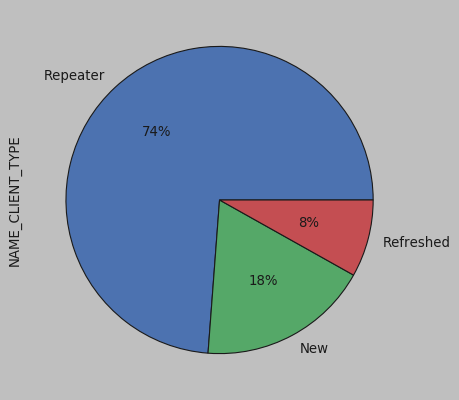

In [233]:
fig = plt.figure(figsize=(20,6))
prev_application_df.NAME_CLIENT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%")
#plt.legend()
plt.show()

**Insight**
- 74% of applicants have had a previous loan and are tagged as 'Repeater'
- 18% of applicatons are 'New'

#### 4. NAME_CASH_LOAN_TYPE

In [234]:
print(prev_application_df.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True))
prev_application_df.NAME_CASH_LOAN_PURPOSE.value_counts().plot.barh()

Repairs                             0.341280
Other                               0.224140
Urgent needs                        0.120801
Buying a used car                   0.041473
Building a house or an annex        0.038673
Everyday expenses                   0.034695
Medicine                            0.031220
Payments on other loans             0.027730
Education                           0.022589
Journey                             0.017793
Purchase of electronic equipment    0.015237
Buying a new car                    0.014533
Wedding / gift / holiday            0.013815
Buying a home                       0.012422
Car repairs                         0.011445
Furniture                           0.010756
Buying a holiday home / land        0.007654
Business development                0.006118
Gasification / water supply         0.004308
Buying a garage                     0.001953
Hobby                               0.000790
Money for a third person            0.000359
Refusal to

**Insights**
- 34% applicants used cash loan for repairs, followed by 22% tagged under 'other'

#### 4. NAME_CONTRACT_STATUS

In [235]:
print(prev_application_df.NAME_CONTRACT_STATUS.value_counts(normalize = True))
prev_application_df.NAME_CONTRACT_STATUS.value_counts().plot.barh()

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64


**Insight**
- 62% of loan applications are Approved
- Number of applications Cancelled are more than the number of applications Refused.

#### 5. CODE_REJECTION_REASON

In [237]:
print(prev_application_df.CODE_REJECT_REASON.value_counts(normalize = True))
prev_application_df.CODE_REJECT_REASON.value_counts().plot.barh()

HC        0.561859
LIMIT     0.178532
SCO       0.120134
CLIENT    0.084764
SCOFR     0.041077
VERIF     0.011335
SYSTEM    0.002299
Name: CODE_REJECT_REASON, dtype: float64


**Insight**
- HC, LIMIT and SCO are top 3 reasons for rejection
- HC covers a majority of 56% followed by LIMIT and SCO which are at 17% and 12% respectively

# Multivariate Analysis

In [239]:
plt.figure(figsize = (20,6))
sns.barplot(x=prev_application_df['NAME_CLIENT_TYPE'],y=prev_application_df['AMT_CREDIT'],hue=prev_application_df['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 90)
plt.title('Client Type v/s Credit Amount v/s Contract status',fontsize=20)
plt.show()

**Insight**
- Number of Approvals for Repeater applicants is more as compared to other client types
- Refreshed type of clients stand 2nd most in terms of application rejection
- More credit is granted to Repeater type customers

In [243]:
prev_application_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT']].corr()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT
AMT_ANNUITY         1.000000         0.805558    0.811670
AMT_APPLICATION     0.805558         1.000000    0.975824
AMT_CREDIT          0.811670         0.975824    1.000000

**Insight**
- AMT_CREDIT is positively co-related to AMT_ANNUITY and strongly co-related to AMT_APPLICATION
- A high co-relation is observed in AMT_ANNUITY and AMT_APPLICATION

# Top 10 co-relation

In [244]:
#Considering only continuous increasing or decreasing variables for top 10 co-relation
coreln_df = application_df[['TARGET','SK_ID_CURR','NAME_CONTRACT_TYPE', 'CODE_GENDER', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE',
                        'DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 
                            'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','EXT_SOURCE_2', 'EXT_SOURCE_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [245]:
#Segmenting dataframe to get to 10 co-relation for each

Target_All_Others = coreln_df[coreln_df['TARGET']==0]
Target_Payment_Diffcuilty = coreln_df[coreln_df['TARGET'] ==1]

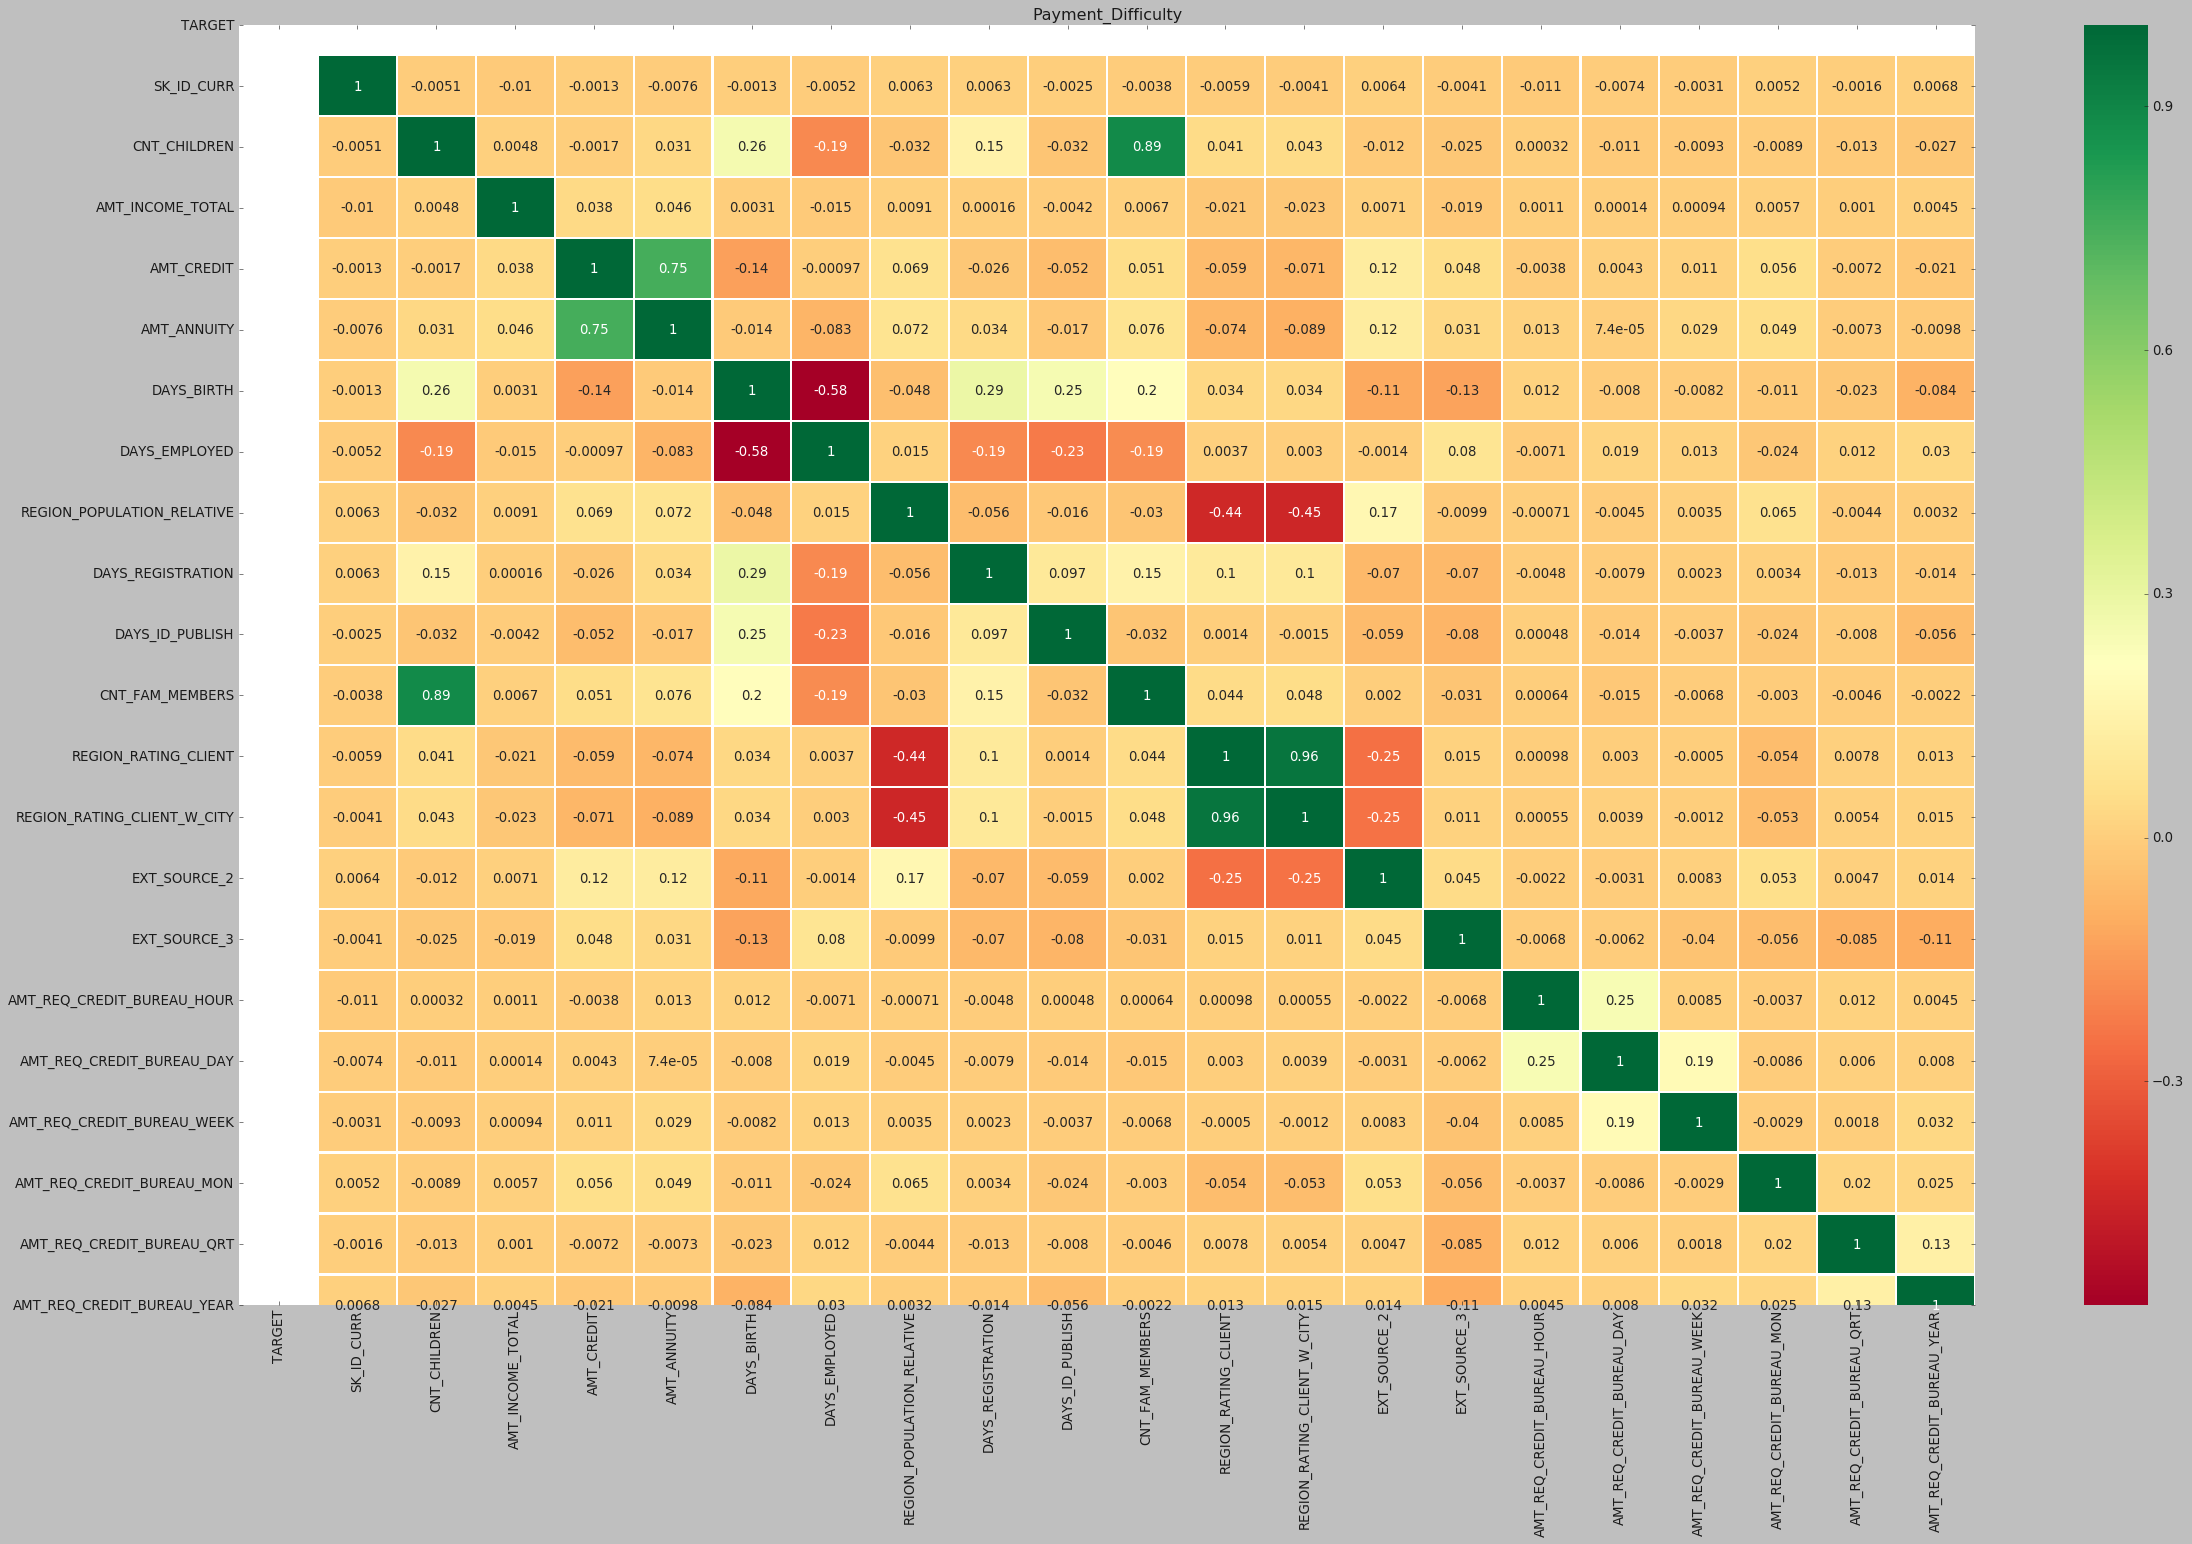

In [251]:
#Heat map 
plt.figure(figsize=(35, 20))
sns.heatmap(Target_Payment_Diffcuilty.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.title('Payment_Difficulty')
plt.show()

In [247]:
# Get the Pearson Coefficient - Understading the strength and direction of a liner relationship
Target_Payment_Diffcuilty_corln = Target_Payment_Diffcuilty.corr(method='pearson')
Target_Payment_Diffcuilty_corln

TARGET  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  DAYS_EMPLOYED  REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
TARGET                          NaN         NaN           NaN               NaN         NaN          NaN         NaN            NaN                         NaN                NaN              NaN              NaN                   NaN                          NaN           NaN           NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
SK_ID_CURR                      NaN    1.000000     -0.005144         -0.010165   -0.001290    -0.007578   -0.001254      -0.005151                    0.006301           0.006342        -0.002539        -0.003816             -0.005936                    -0.004135      0.006388     -0.004144                   -0.011106                  -0.007388                   -0.003075                   0.005180                  -0.001614                    0.006843
CNT_CHILDREN                    NaN   -0.005144      1.000000          0.004796   -0.001675     0.031257    0.259109      -0.191942                   -0.031975           0.149154        -0.032299         0.885484              0.040680                     0.043185     -0.012090     -0.024512                    0.000316                  -0.011255                   -0.009316                  -0.008852                  -0.013029                   -0.027253
AMT_INCOME_TOTAL                NaN   -0.010165      0.004796          1.000000    0.038131     0.046421    0.003096      -0.014979                    0.009135           0.000158        -0.004215         0.006654             -0.021486                    -0.022808      0.007068     -0.018655                    0.001079                   0.000135                    0.000941                   0.005718                   0.001037                    0.004516
AMT_CREDIT                      NaN   -0.001290     -0.001675          0.038131    1.000000     0.752195   -0.135316      -0.000968                    0.069161          -0.025854        -0.052329         0.051224             -0.059193                    -0.071377      0.120028      0.048141                   -0.003771                   0.004346                    0.010598                   0.056227                  -0.007201                   -0.020698
AMT_ANNUITY                     NaN   -0.007578      0.031257          0.046421    0.752195     1.000000   -0.014303      -0.082552                    0.071690           0.034279        -0.016767         0.075711             -0.073784                    -0.089291      0.115292      0.031235                    0.012968                   0.000074                    0.028784                   0.049000                  -0.007261                   -0.009819
DAYS_BIRTH                      NaN   -0.001254      0.259109          0.003096   -0.135316    -0.014303    1.000000      -0.575097                   -0.048190           0.289114         0.252863         0.203267              0.033928                     0.033631     -0.108425     -0.129972                    0.011650                  -0.007956                   -0.008244                  -0.010923                  -0.022904                   -0.083838
DAYS_EMPLOYED                   NaN   -0.005151     -0.191942         -0.014979   -0.000968    -0.082552   -0.575097       1.000000                    0.015103          -0.188929        -0.226470        -0.186561              0.003679                     0.002992     -0.001407      0.080035                   -0.007109                   0.019190                    0.01291

In [248]:
#Get the values of the triangle above the diagonal
Target_Payment_Diffcuilty_corln = Target_Payment_Diffcuilty_corln.where(np.triu(np.ones(Target_Payment_Diffcuilty_corln.shape),k=1).astype(np.bool)).unstack().reset_index()
Target_Payment_Diffcuilty_corln.columns =['Variable_1','Variable_2','Co-relation']
Target_Payment_Diffcuilty_corln.dropna(subset = ["Co-relation"], inplace = True)

#### Below table gives top 10 co-relation for Target_Payment_Difficuilty

In [249]:
#Take only the absolute values and sort top 10
Target_Payment_Diffcuilty_corln["Co-relation"]=Target_Payment_Diffcuilty_corln["Co-relation"].abs() 
Target_Payment_Diffcuilty_corln.sort_values(by='Co-relation', ascending=False, inplace=True) 
Target_Payment_Diffcuilty_corln.head(10)

Variable_1                  Variable_2  Co-relation
298  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637
244              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
114                  AMT_ANNUITY                  AMT_CREDIT     0.752195
160                DAYS_EMPLOYED                  DAYS_BIRTH     0.575097
294  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.446977
272         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.443236
204            DAYS_REGISTRATION                  DAYS_BIRTH     0.289114
134                   DAYS_BIRTH                CNT_CHILDREN     0.259109
226              DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863
320                 EXT_SOURCE_2        REGION_RATING_CLIENT     0.250335

**Insights**
- The  region_rating_client and region_rating_client_w_city are directly proportional to each other as they
  have higher positive correlation for customers with payment difficulties
- Similar direction can be found between family members and children count
- Annuity amount is highly co-related to Credit which is again co-related to price of goods
- This does highlight the bad spend habits of default applicants who inadvertently face difficuilty for payment

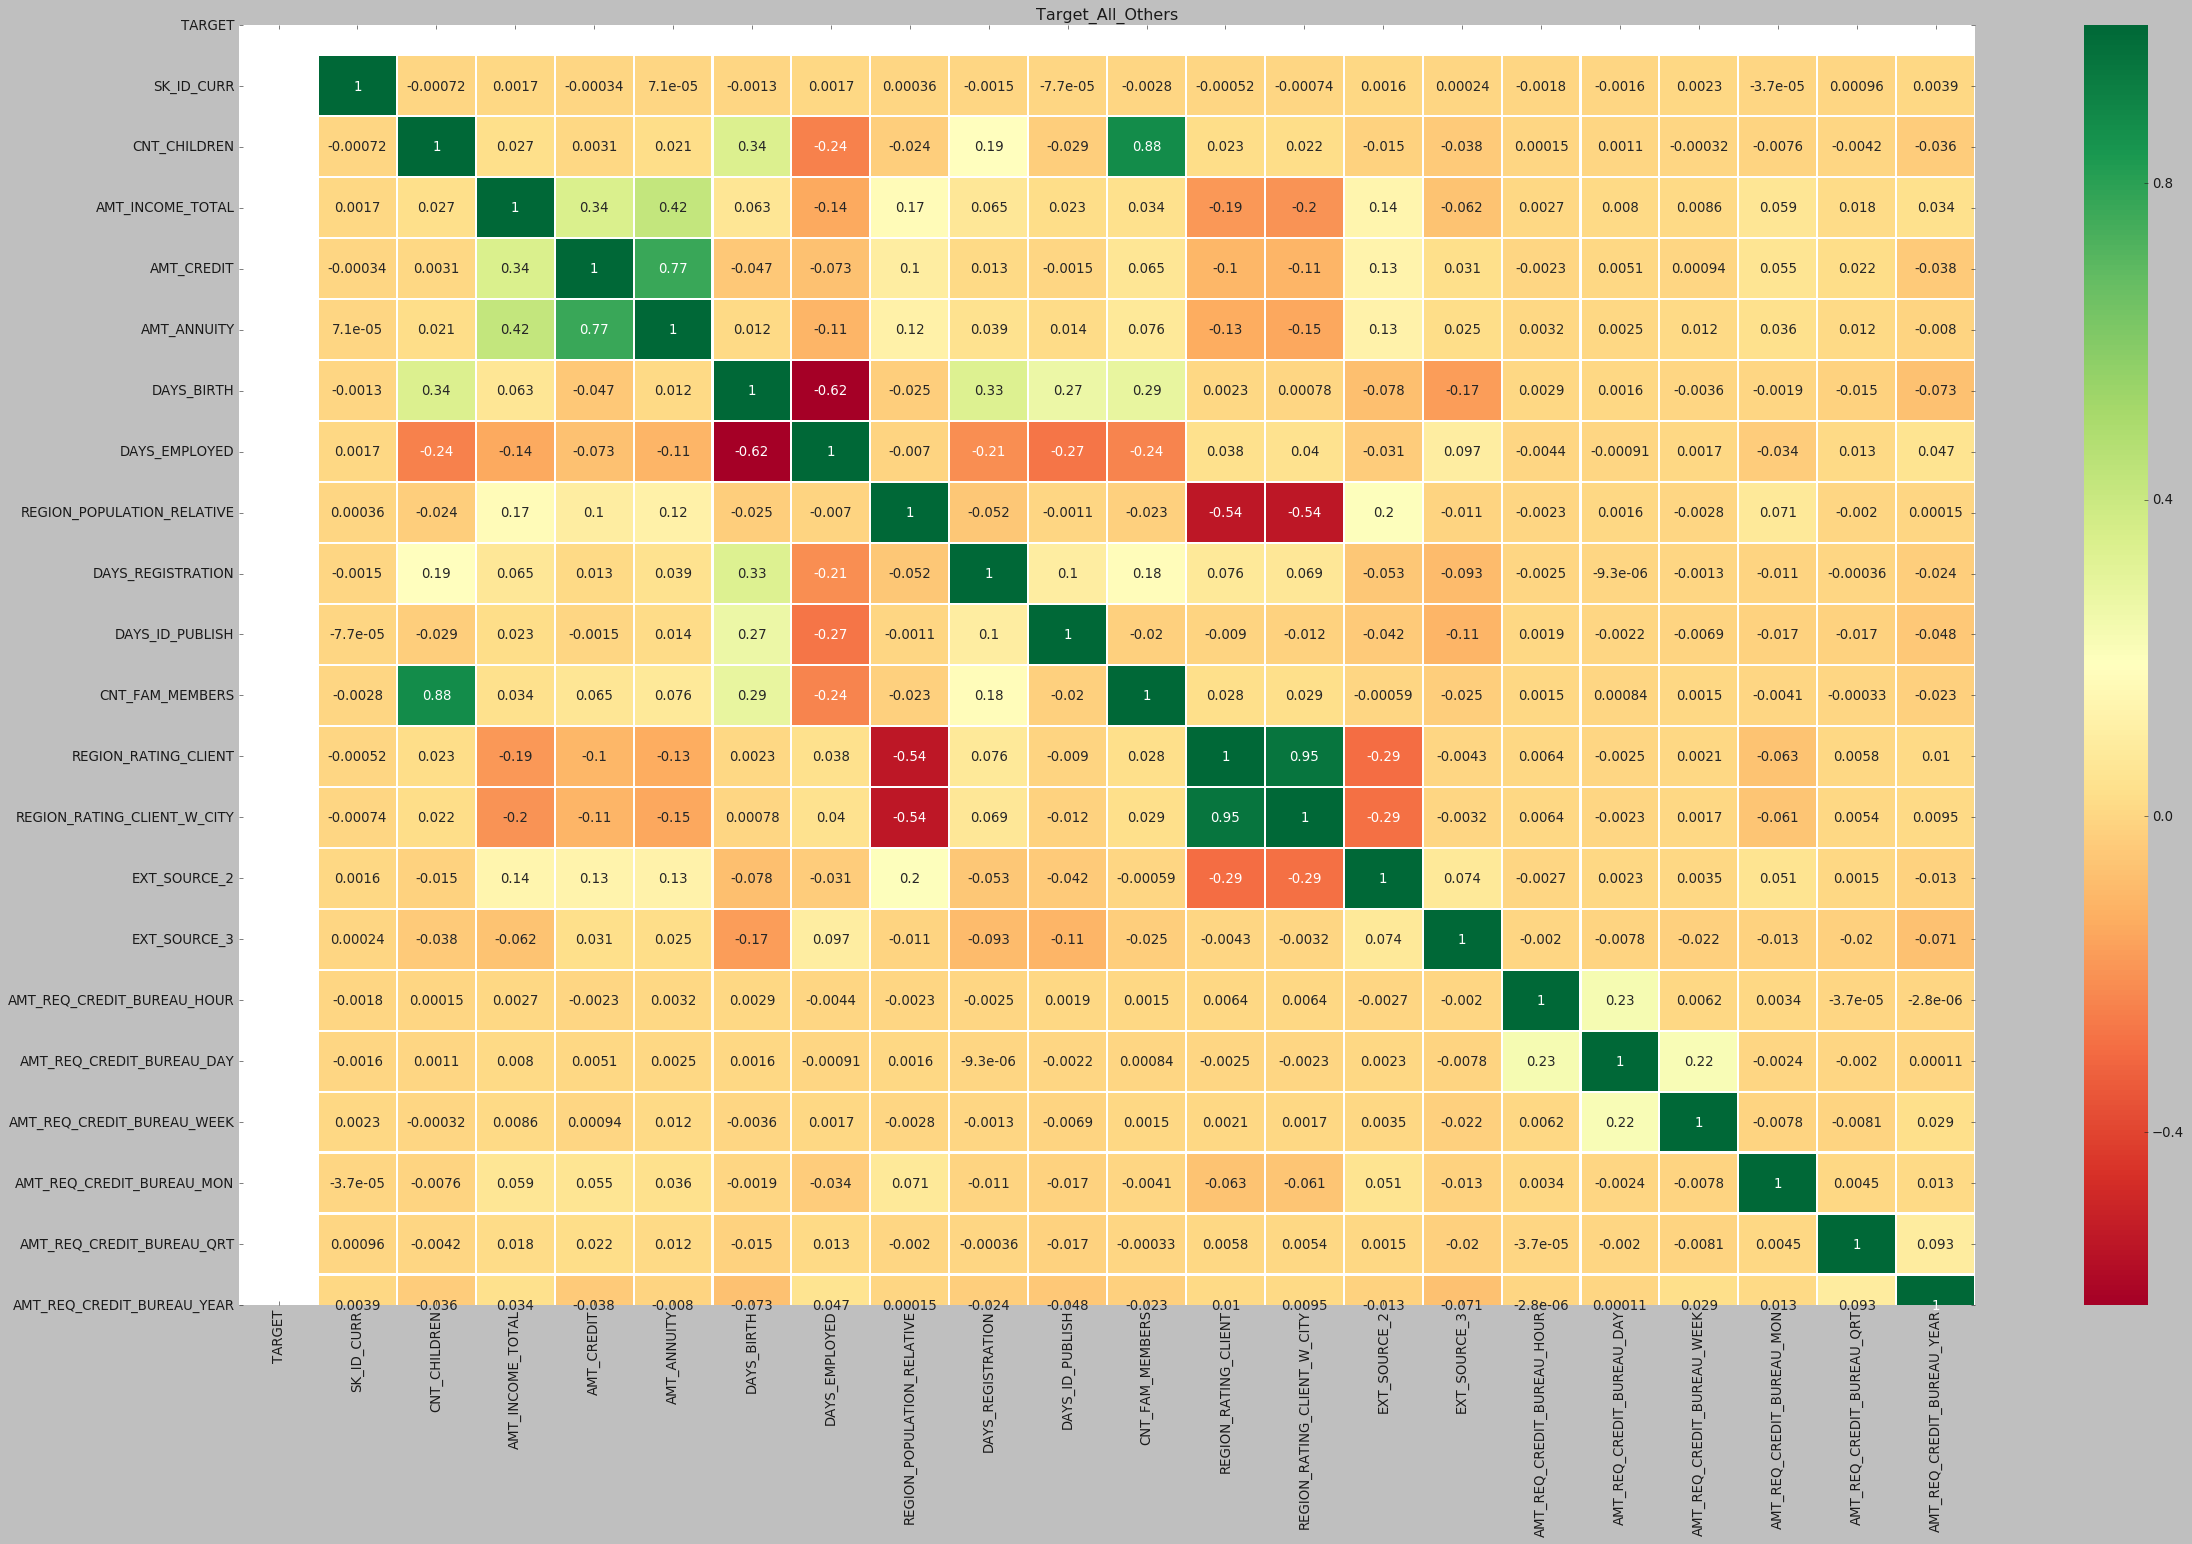

In [252]:
# Getting  top 10 correlation for All others
# Plotting Heat map for better correlation visualization for Target All others

plt.figure(figsize=(35, 20))
sns.heatmap(Target_All_Others.corr(),cmap="RdYlGn",annot=True,linewidth =1)
plt.title('Target_All_Others')
plt.show()

In [253]:
Target_All_Others_corln = Target_All_Others.corr(method='pearson')
Target_All_Others_corln

TARGET  SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  DAYS_BIRTH  DAYS_EMPLOYED  REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
TARGET                          NaN         NaN           NaN               NaN         NaN          NaN         NaN            NaN                         NaN                NaN              NaN              NaN                   NaN                          NaN           NaN           NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN
SK_ID_CURR                      NaN    1.000000     -0.000716          0.001739   -0.000342     0.000071   -0.001346       0.001744                    0.000360          -0.001475        -0.000077        -0.002789             -0.000519                    -0.000739      0.001570      0.000244                   -0.001774                  -0.001626                    0.002298                  -0.000037                   0.000963                    0.003852
CNT_CHILDREN                    NaN   -0.000716      1.000000          0.027397    0.003081     0.020909    0.336966      -0.243356                   -0.024363           0.185792        -0.028751         0.878571              0.022842                     0.021866     -0.015438     -0.038306                    0.000147                   0.001057                   -0.000315                  -0.007640                  -0.004218                   -0.035861
AMT_INCOME_TOTAL                NaN    0.001739      0.027397          1.000000    0.342799     0.418948    0.062609      -0.141250                    0.167851           0.064937         0.022896         0.034254             -0.186573                    -0.200466      0.139411     -0.062497                    0.002707                   0.008029                    0.008647                   0.058682                   0.017676                    0.034384
AMT_CREDIT                      NaN   -0.000342      0.003081          0.342799    1.000000     0.771297   -0.047378      -0.072515                    0.100604           0.013477        -0.001464         0.064536             -0.103337                    -0.112238      0.128878      0.031087                   -0.002267                   0.005135                    0.000941                   0.055063                   0.021825                   -0.037519
AMT_ANNUITY                     NaN    0.000071      0.020909          0.418948    0.771297     1.000000    0.012260      -0.106421                    0.120977           0.039435         0.014111         0.075789             -0.132120                    -0.145144      0.126358      0.024605                    0.003220                   0.002465                    0.012377                   0.036291                   0.011660                   -0.008013
DAYS_BIRTH                      NaN   -0.001346      0.336966          0.062609   -0.047378     0.012260    1.000000      -0.618048                   -0.025244           0.333151         0.271314         0.285823              0.002332                     0.000780     -0.078125     -0.172733                    0.002926                   0.001587                   -0.003570                  -0.001871                  -0.015427                   -0.073352
DAYS_EMPLOYED                   NaN    0.001744     -0.243356         -0.141250   -0.072515    -0.106421   -0.618048       1.000000                   -0.006961          -0.210187        -0.274290        -0.237412              0.037851                     0.040028     -0.030613      0.097380                   -0.004380                  -0.000908                    0.00170

In [254]:
Target_All_Others_corln = Target_All_Others_corln.where(np.triu(np.ones(Target_All_Others_corln.shape),k=1).astype(np.bool)).unstack().reset_index()
Target_All_Others_corln.columns =['Variable_1','Variable_2','Co-relation']
Target_All_Others_corln.dropna(subset = ["Co-relation"], inplace = True)

#### Top 10 Co-relation for Target_All_others/Non-Defaulters

In [255]:
Target_All_Others_corln["Co-relation"]=Target_All_Others_corln["Co-relation"].abs() 
Target_All_Others_corln.sort_values(by='Co-relation', ascending=False, inplace=True) 
Target_All_Others_corln.head(10)

Variable_1                  Variable_2  Co-relation
298  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149
244              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
114                  AMT_ANNUITY                  AMT_CREDIT     0.771297
160                DAYS_EMPLOYED                  DAYS_BIRTH     0.618048
272         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.539005
294  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537301
113                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.418948
91                    AMT_CREDIT            AMT_INCOME_TOTAL     0.342799
134                   DAYS_BIRTH                CNT_CHILDREN     0.336966
204            DAYS_REGISTRATION                  DAYS_BIRTH     0.333151

**Insights**
- As compared to Target_Payment_Difficulty there is a slight shift in coefficients
- Credit, Annuity and goods amount which go hand in hand with high positive co-relation as opposed to customers with payment
  difficulties.
- Regional ratings as per population in the area do play a vital role as we can see a major shift in coefficient which is 0.53
  for Target_all_others as opposed to 0.44 for Target_Payment_difficulty

## Merging Application_data.csv and Previous_app_data.csv to get a wholistic view of customers

In [257]:
Merged_data = pd.merge(application_df, prev_application_df, how='inner', on=['SK_ID_CURR'])
Merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_IN_YEARS AGE_IN_YEARS_BUCKET  EMPLOYEMENT_IN_YEARS EMPLOYMENT_YEARS_BUCKET  AMT_INCOME_TOTAL_LAKHS AMT_INCOME_TOTAL_BUCKET  AMT_CREDIT_LAKHS_x AMT_CREDIT_LAKHS_BUCKET  Credit_Ratio  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  AMT_ANNUITY_LAKHS  AMT_APPLICATION_LAKHS  AMT_CREDIT_LAKHS_y
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5            351000     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120        YES            YES              NO              YES        YES         NO        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         25.92               25-30                  1.75                     0-5                    2.02                    2-3L                4.07                    0-5L          2.01     1038818       Consumer loans       9251.775     

In [259]:
Merged_data.shape

(1413701, 117)

In [261]:
Merged_data.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 117 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE_x            object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x               object
NAME_TYPE_SUITE_x               object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      object
FLAG_EMP_PHONE               

In [271]:
# Creating Function for plotting
def Merged_data_plot(Var_1,Var_2):

    plt.style.use('ggplot')
    Overall = Merged_data.pivot_table(values='SK_ID_CURR', 
                      index=Var_1,
                      columns=Var_2,
                      aggfunc='count')
    Overall=Overall.div(Overall.sum(axis=1),axis='rows')*100
    sns.set()
    Overall.plot(kind='bar',figsize=(10,5))
    plt.xlabel(f'{Var_1}')
    plt.ylabel(f'{Var_2}%')
    plt.show()

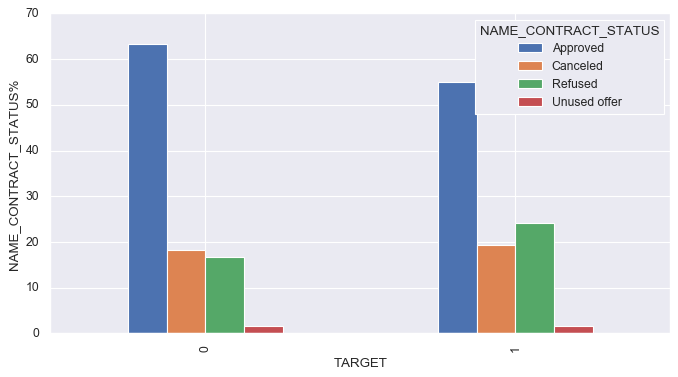

In [267]:
Merged_data_plot('TARGET','NAME_CONTRACT_STATUS')

**Insight**
- Customers who historically defaulted, have a high chance of loan disapproval

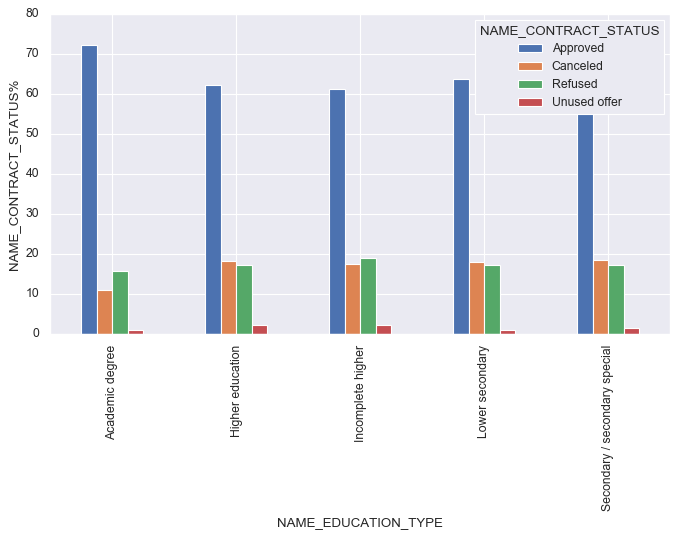

In [272]:
Merged_data_plot('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

**Insights**
- Customers with academic degree have a high approval rate, conversely there is also rejection of about ~15% seen
- As expected the refusals are more for customers with an incomplete higher education

In [282]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)

In [284]:
pd.pivot_table(data=Merged_data,index=['NAME_CONTRACT_STATUS'],columns=['TARGET','NAME_INCOME_TYPE'],values ='AMT_CREDIT_LAKHS_x',aggfunc = [np.sum,'count'])

sum                                                                                                                                                           count                                                                                                                                         
TARGET                                  0                                                                            1                                                                                  0                                                                           1                                                             
NAME_INCOME_TYPE     Commercial associate  Pensioner State servant Student Unemployed     Working Commercial associate Maternity leave Pensioner State servant Unemployed    Working Commercial associate  Pensioner State servant Student Unemployed    Working Commercial associate Maternity leave Pensioner State servant Unemployed   Working
NAME_CONTRACT_STATUS                                                                                                                                                                                                                                                                                                                              
Approved                      1219236.070 862482.510    388256.570  75.600    400.600 2430939.390            87105.420         103.080 51603.670     22266.410    210.340 224048.600           184302.000 161229.000     58134.000  20.000     37.000 415134.000            14205.000          10.000  8915.000      3496.000     31.000 40586.000
Canceled                       348445.560 295502.110     93936.500  21.080     51.980  638904.150            29656.990          28.720 19434.850      6739.040     51.070  73427.170            54691.000  54167.000     14576.000   3.000      5.000 112199.000             5094.000           2.000  3507.000      1103.000     11.000 14083.000
Refused                        321263.770 219655.110     89318.180   1.800    148.070  592238.410            38655.300          43.080 18700.060      7712.550    139.700  92338.900            51670.000  40368.000     14249.000   1.000     13.000 109651.000             6447.000           3.000  3434.000      1348.000     25.000 18181.000
Unused offer                    29866.910   9641.210      9392.890     nan     18.050   73632.910             1910.980          14.360   583.740       674.960        nan   7333.050             4733.000   1822.000      1411.000     nan      1.000  12925.000              339.000           1.000   102.000       107.000        nan  1330.000

In [283]:
Merged_data.groupby(['TARGET','NAME_CONTRACT_STATUS'])['AMT_CREDIT_LAKHS_x'].sum()

TARGET  NAME_CONTRACT_STATUS
0       Approved               4901390.740
        Canceled               1376861.380
        Refused                1222625.340
        Unused offer            122551.970
1       Approved                385337.520
        Canceled                129337.840
        Refused                 157589.590
        Unused offer             10517.090
Name: AMT_CREDIT_LAKHS_x, dtype: float64

In [285]:
Merged_data.groupby(['TARGET'])['AMT_CREDIT_LAKHS_x'].sum()

TARGET
0   7623429.430
1    682782.040
Name: AMT_CREDIT_LAKHS_x, dtype: float64

# Conclusion - Following are the final points

**Observations**

1. Defaulters have an approved credit of ~3.8LPA which is ~7.2% of total credit approved. This likely, implies a loss
   considering the financial difficulties faced by the defaulters
2. In non- Defaulter customers the cancellation is high considering 13.7LPA of total credit cancelled
3. In non - Defaulter Credit refusal is unexpectedly high, with 88% of customers likely to pay back, have faced Credit refusal

**Recommendations**

1. Stringent Background checks to verify the major drivers like AGe Group, Education bcakground, Total Income,
   Type of Employment, Job Title
2. To minimize risk, customers with good credit history should be given complimentary rewards, thus encourging
   the cashflow
3. Perform Initial Risk assesments so as to have a risk score associated with the customer
4. Instead of having a single figure a per month annuity, structure it based on risk involved